<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 · Aprenentatge automàtic · PAC4</p>

<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

# **PAC 4: Combinació de Models**

## Objectiu
Aquesta quarta Pràctica d'Avaluació Contínua (PAC 4) té com a objectiu principal consolidar els coneixements adquirits a les PAC anteriors (introducció a l'aprenentatge automàtic, anàlisi exploratòria de dades, mètodes supervisats i no supervisats) i introduir i aprofundir en tècniques avançades d'Ensemble Learning (Aprenentatge per Conjunts).

En finalitzar aquesta PAC, hauries de ser capaç de:

* Implementar i comparar diverses tècniques d'ensemble learning (p. ex., Bagging/Random Forest, Boosting -AdaBoost, Gradient Boosting-, i Stacking) sobre un conjunt de dades específic.
* Analitzar i explicar com els hiperparàmetres clau dels mètodes ensemble influeixen en el seu comportament i rendiment.
* Avaluar i comparar la importància de les característiques (feature importance) obtinguda a través de diferents models ensemble.
* Justificar quan i per què un mètode ensemble podria ser preferible a un altre, o a un model individual (connectant amb conceptes com el trade-off biaix-variància).
* Aplicar correctament metodologies de validació (com la validació creuada) per a l'avaluació i comparació robusta dels models ensemble.

## Conjunt de dades
Treballaràs amb dos conjunts de dades sintètics, generats específicament per a aquesta pràctica: un per a un problema de classificació multiclase i un altre per a un problema de regressió. Ambdós datasets han estat dissenyats per incloure diverses complexitats (com desequilibri de classes, relacions no lineals, interaccions entre variables, soroll, variables irrellevants, etc.) que posaran a prova les capacitats de diferents algorismes.

L'objectiu no és només implementar els algorismes, sinó sobretot analitzar en profunditat el seu comportament, comparar els seus resultats i justificar les teves conclusions basant-te sempre en l'evidència obtinguda dels teus propis experiments i resultats numèrics/gràfics. Es valorarà especialment la capacitat crítica i la profunditat de les teves interpretacions.

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: Marc Cervera Rosell</strong>
</div>

## 1. Combinació de models de Classificació (6 punts)

### 1.1. Càrrega i Anàlisi Exploratòria de Dades -EDA- (0.5 punts)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Carrega el dataset <code>dataset_clasificacion_pec4.csv</code>.
2. Realitza una exploració inicial: revisa la informació general, identifica els tipus de dades, valors mancants, outliers, anàlisi de correlacions, etc.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [1]:
import pandas as pd
df_clasifiaction = pd.read_csv("dataset_clasificacion_pec4.csv", header=0) # header = 0 -> fila 0 = capçaleres

In [2]:
# Exploració del dataset -> Informació general
print("-------------------- Shape --------------------")
print(df_clasifiaction.shape) # (files, columnes)
print("-------------------- Columnes --------------------")
print(df_clasifiaction.columns)

-------------------- Shape --------------------
(3000, 24)
-------------------- Columnes --------------------
Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'target'],
      dtype='object')


In [3]:
# Exploració del dataset -> Maxim i mínim de target
print(f"Màxim target: {max(df_clasifiaction["target"])}\n")
print(f"Mínim target: {min(df_clasifiaction["target"])}\n")

Màxim target: 2

Mínim target: 0



In [4]:
# Exploració del dataset -> Nulls
print("-------------------- Comprovació de nulls --------------------")
print(df_clasifiaction.isnull().sum())

-------------------- Comprovació de nulls --------------------
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
target        0
dtype: int64


In [5]:
# Explocració del dataset -> tipus de les columnes
print("-------------------- Tipus de les columnes --------------------")
print(df_clasifiaction.dtypes)

-------------------- Tipus de les columnes --------------------
feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21     object
feature_22     object
target          int64
dtype: object


In [6]:
# Exploració del dataset -> Outliers
print("-------------------- Outliers --------------------")
df_nums = df_clasifiaction.select_dtypes(include=["float64"])
q1 = df_nums.quantile(0.25)
q3 = df_nums.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
outliers = ((df_nums < lower_limit) | (df_nums > upper_limit))
print(outliers.sum())

-------------------- Outliers --------------------
feature_0      24
feature_1      30
feature_2      20
feature_3      54
feature_4      22
feature_5      29
feature_6      22
feature_7      27
feature_8      48
feature_9      21
feature_10     46
feature_11     47
feature_12     27
feature_13     22
feature_14     55
feature_15     27
feature_16     22
feature_17     42
feature_18     10
feature_19     29
feature_20    168
dtype: int64


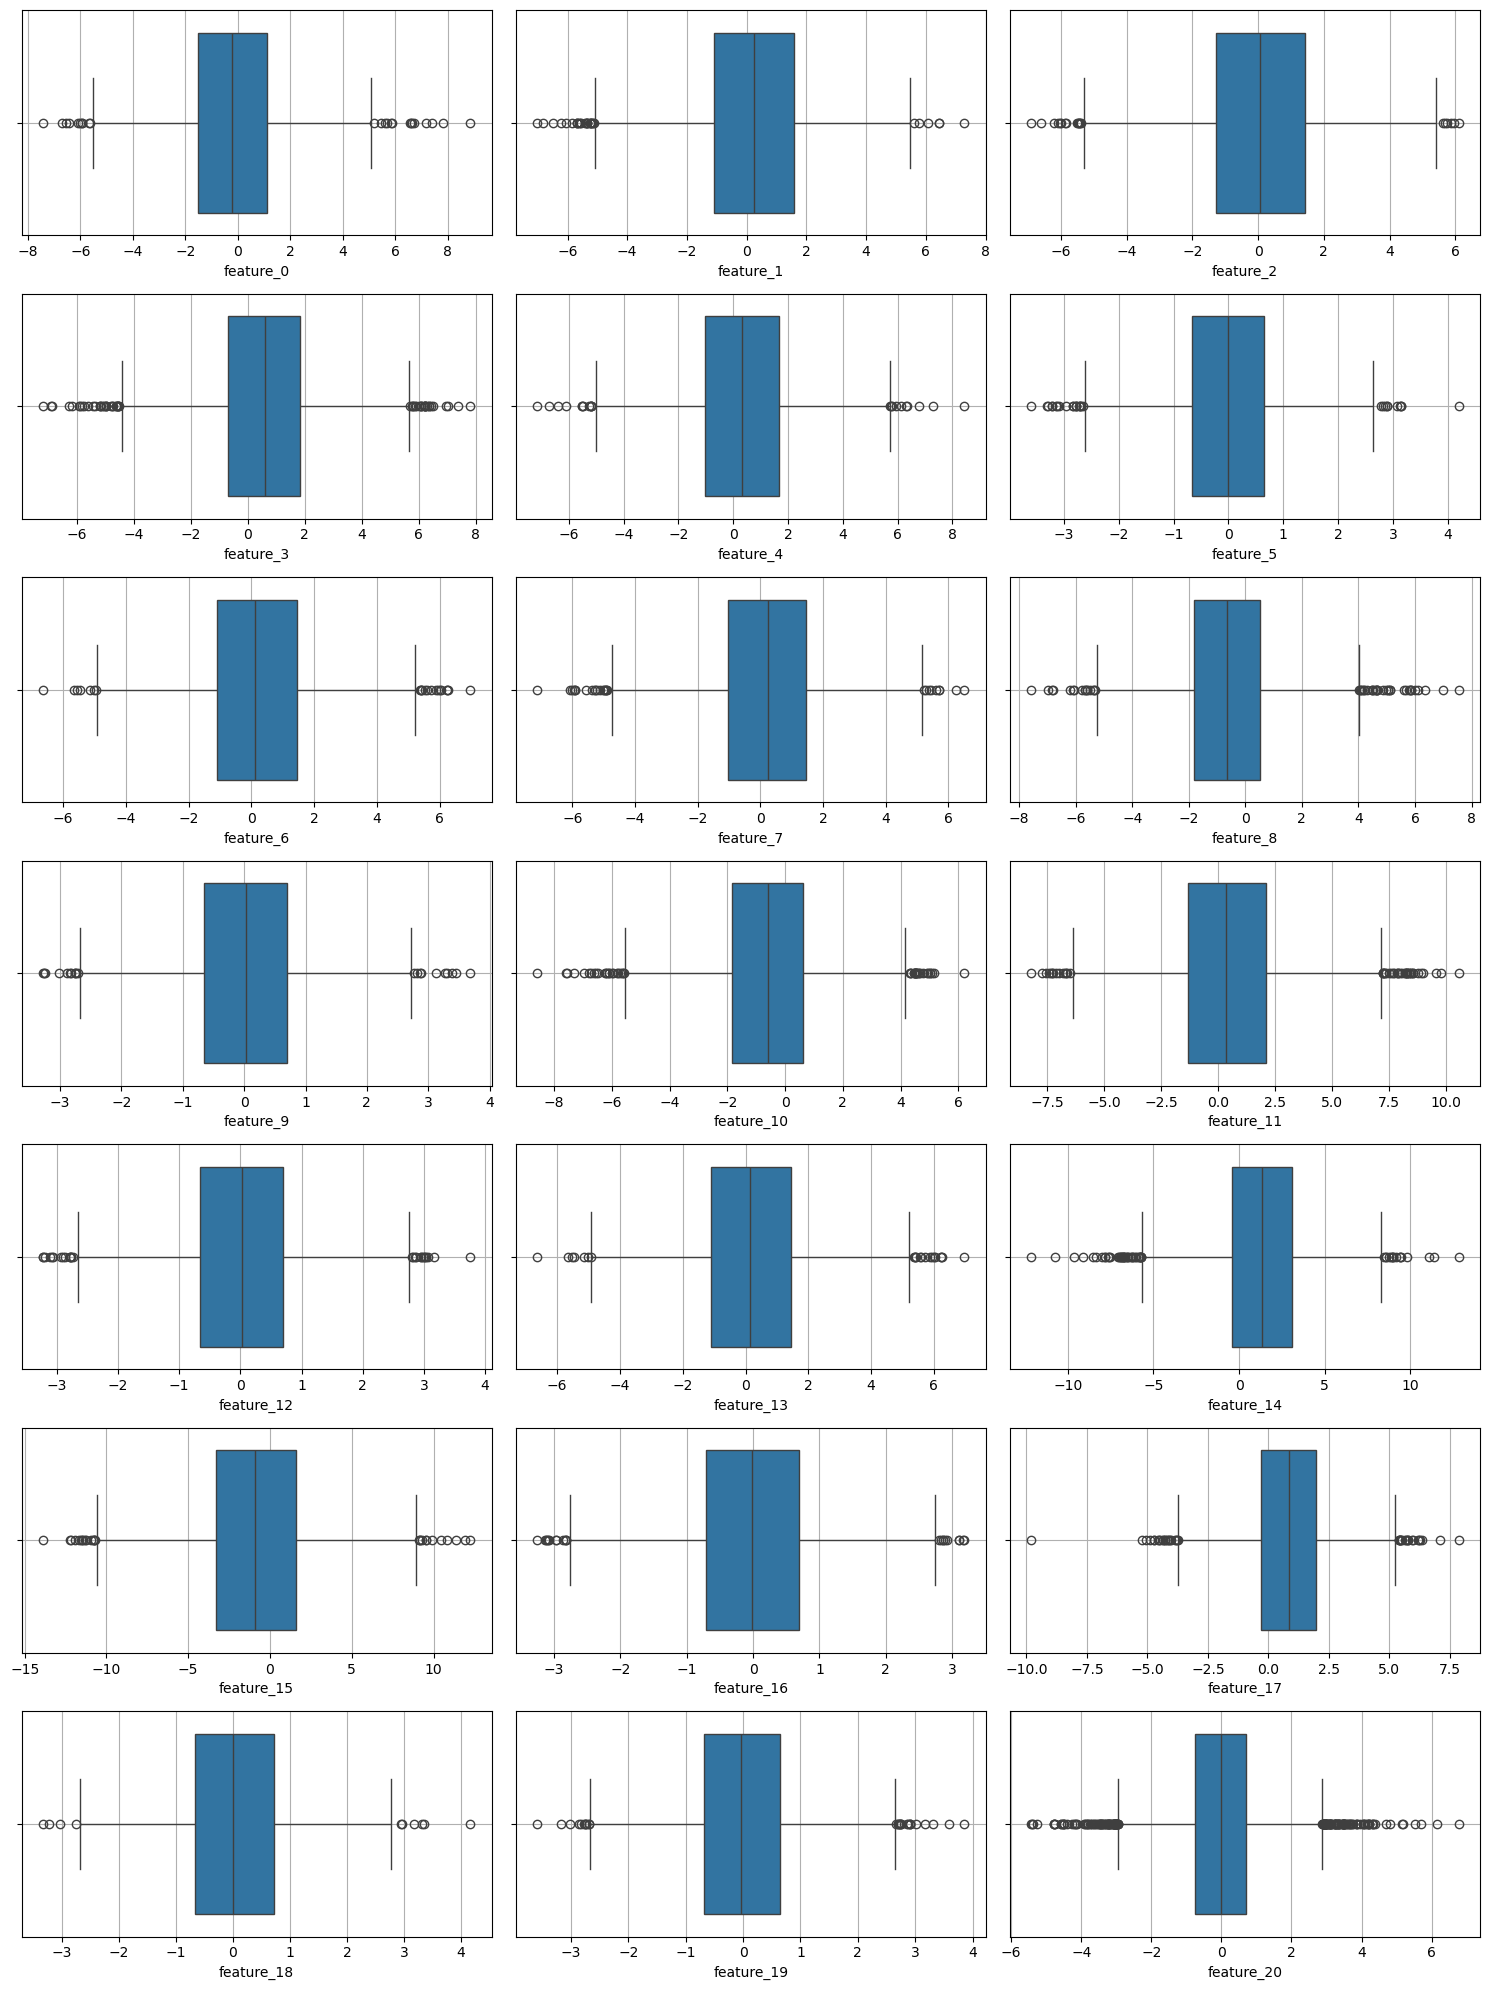

In [7]:
# Exploració del dataset -> Outliers (boxplot)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,20))
i = 1
for column in df_nums.columns:
    plt.subplot(7, 3, i) # La i es la posició de cada gràfic
    sns.boxplot(data=df_nums, x=column)
    plt.grid(True)
    plt.tight_layout()
    i += 1
plt.show()

-------------------- Correlacions --------------------


<Axes: >

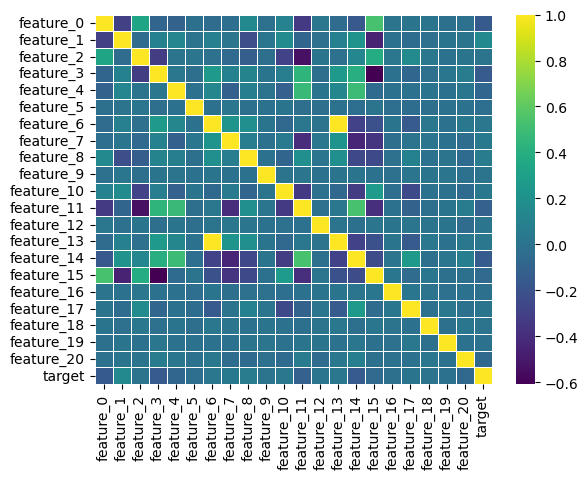

In [8]:
# Exploració del dataset -> Correlació entre les variables numèriques
print("-------------------- Correlacions --------------------")
df_nums["target"] = df_clasifiaction["target"]
correlations = df_nums.corr() # Crea la matriu de correlació entre les variables
sns.heatmap(correlations, linewidth=.5, cmap='viridis')

In [9]:
# Exploració del dataset -> Comprovació de duplicats
duplicates = df_clasifiaction.duplicated().sum()
duplicates

0

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Anàlisi de la informació general** -> En la informació bàsica del dataset es pot observar que aquest està compost per un total de 3000 files i 24 columnes. Aquestes files segueixen un patró en el seu nom: 'feature_i': $$i \in [0, 20] \forall i \in \mathbb{N}$$

L'única columna que trenca amb aquest patró és la columna 'target', que conté valors: $$target_{i} \in \{0, 1, 2\} \forall i \in [1,3001] \forall i \in \mathbb{N}$$

**Anàlisi de valors Null** -> S'ha pogut observar que el dataset no té valors perduts, és a dir, no hi ha valors Null en cap registre.

**Comprovació d'_outliers_** -> Per comprovar els _outliers_, s'han pres totes les columnes menys les columnes de tipus _object_ i _target_. El nombre d'_outliers_ per cada columna ha estat calculat mitjançant el mètode del rang interquartíl·lic: $$outliers = \{df\_nums[feature_{i}] \forall [(df\_nums[feature_{i}] < Q3 + (1.5 * iqr)) \vee  (df\_nums[feature_{i}] > Q1 - (1.5 * iqr))] \} $$
sent iqr: $$iqr = Q3 - Q1$$
Un cop aplicat el mètode, s'han pogut observar _outliers_ en totes les columnes.

Per corroborar la presència d'_outliers_, s'ha dibuixat un _boxplot_ de cada columna. Amb els diferents diagrames de caixa s'ha confirmat la presència de valors atípics.

**Anàlisi de correlacions** -> Per analitzar la correlació entre les variables només s'han considerat les variables del tipus _float64_ i la variable _target_ (_int64_) i s'han exclòs les variables _object_, ja que el mètode _corr()_ de la llibreria Pandas utilitza la correlació de Pearson. És a dir, mesura la relació lineal entre les variables, per aquest motiu les variables categòriques s'han deixat fora de l'anàlisi de correlacions.

En el mapa de calor es pot observar que com mes fosc és el color (més proper al lila fosc), més forta és la correlació negativa i com més clar és el color (més proper al groc), més forta és la correlació positiva. Aquelles posicions del mapa de calor amb un color blau mig/mig-fosc tenen un correlació de 0 o propera a 0, és a dir, son variables no correlacionades.

**Anàlisi de duplicats** -> Quelcom important en un _dataset_ és saber si hi ha registres duplicats ja què l'existència de registres duplicats pot comportar a biaixos, resultats enganyosos i/o un deteriorament de la qualitat de les dades. En aquest cas, s'ha pogut observar que no hi ha registres duplicats.
</div>

**Consultes externes:**

[Pandas.(nd)._pandas.read_csv_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

[Pandas.(nd)._pandas.DataFrame.select_dtypes_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

[Pandas.(nd)._pandas.DataFrame.corr_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

[Pandas.(nd)._pandas.DataFrame.duplicated_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

[Seaborn.(nd)._seaborn.boxplot_.Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

[Seaborn.(nd)._seaborn.heatmap_.Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Marta Castrillo.(13/09/2023)._Cómo identificar y tratar outliers con Python_.Medium](https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

3. Aplicar una estratègia de codificació adequada per poder fer servir les variables categòriques en els models. Justifica la teva elecció.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [10]:
df_clasifiaction_encoded = pd.get_dummies(df_clasifiaction, columns=["feature_21", "feature_22"], dtype=int)
df_clasifiaction_encoded.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_20,target,feature_21_CatA_0,feature_21_CatA_1,feature_21_CatA_2,feature_21_CatA_3,feature_22_TypeW,feature_22_TypeX,feature_22_TypeY,feature_22_TypeZ
0,1.821258,0.910395,0.459186,-1.030711,2.098087,1.921148,-2.657309,-1.737789,-0.491327,0.782738,...,0.361828,2,0,0,0,1,0,1,0,0
1,4.229767,-0.434469,4.726087,0.995552,-3.966756,2.444360,-3.308983,0.848826,0.707739,-1.066422,...,3.457472,2,0,0,0,1,0,0,0,1
2,0.860488,0.984565,0.042947,-0.365520,-4.947303,-0.574780,-2.312484,2.228463,-0.119455,0.893592,...,-0.046276,1,0,0,1,0,1,0,0,0
3,1.503285,1.769841,1.307190,1.309311,1.169251,0.514564,0.847147,0.674670,-3.177230,-0.638325,...,1.055786,1,0,0,0,1,1,0,0,0
4,-0.019055,-1.569077,-0.824806,2.347602,-1.001121,0.323452,-1.198919,-1.544061,-2.337010,0.125649,...,0.688510,0,0,0,1,0,0,0,0,1


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Justificació de tècnica de codificació** -> Per codificar les variables categòriques s'ha emprat la tècnica _One-Hot_. Aquesta tècnica transforma les dades categòriques en un format que els models de _machine learning_ puguin entendre i usar.

Concretament crea una columna per cada valor únic de les variables a codificar i assigna 1 o 0 segons el valor categòric del registre. D'aquesta manera en cada registre en comptes d'haver dues variables categòriques (en aquest cas), hi ha un vector de 1 i 0 que indiquen la presència o absència de la categoria en aquell registre.

</div>

**Consultes externes:**

[datacamp.(29/07/2024)._¿Qué es la codificación en caliente y cómo implementarla en Python?_.datacamp](https://www.datacamp.com/es/tutorial/one-hot-encoding-python-tutorial)

[Pandas.(nd)._pandas.get_dummies_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

4. Analitza la distribució de la variable objectiu (<code>target</code>). Visualitza-la (ex., <code>countplot</code>) i comenta explícitament sobre el grau de desequilibri entre classes.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

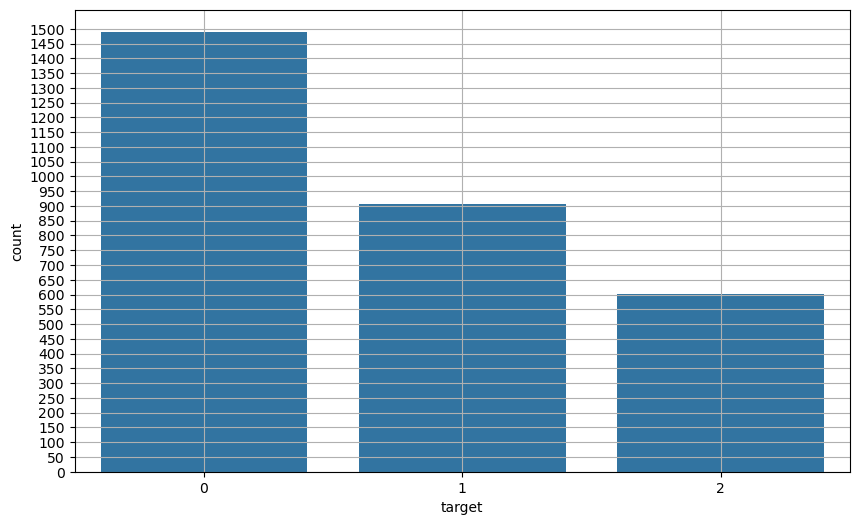

In [11]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df_clasifiaction_encoded)
plt.yticks(np.arange(0, 1550, 50))
plt.grid()
plt.show()

In [12]:
print(df_clasifiaction_encoded["target"].value_counts())

target
0    1490
1     907
2     603
Name: count, dtype: int64


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Amb el _countplot_, és pot observar que el valor 0 té un recompte d'uns 1500, el valor 1 d'uns 900 i el valor 2 d'uns 600 (en la cèl·la d'aconttinuació del gràfic es veuen els valors exactes). Com queda evidenciat la categoria 0 és la que més registres té amb 1490 registres i la categoria 2 la que menys amb 603 registres.

Es pot observar un cert desequilibri entre les classes, tot i que no n'hi ha cap que tingui un nombre de registres extremadament baix.

Aquest desequilibri pot afectar negativament als models que es puguin fer posteriorment i caldrà tenir en compte aquesta diferència entre les classes. 

Caldrà valorar si es pertinent equilibrar les classes amb alguna tècnica de _oversampling_ o _undersampling_.

</div>

**Consultes externes:**

[Seaborn.(nd)._seaborn.countplot_.Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html)

[Multiple authors.(Multiple dates)._Cambiar escala eje Y en matplolib_.StackOverflow](https://es.stackoverflow.com/questions/549758/cambiar-escala-eje-y-en-matplolib)

[Pandas.(nd)._pandas.Series.value_counts_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

5. Selecciona una variable numèrica i una variable categòrica que, després de la teva exploració inicial, consideris potencialment influents per a predir la variable objectiu. Justifica la teva elecció.
6. Visualitza la distribució de les variables seleccionades separant-les per classe. Comenta els patrons o diferències que observes.
&nbsp; &nbsp;
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

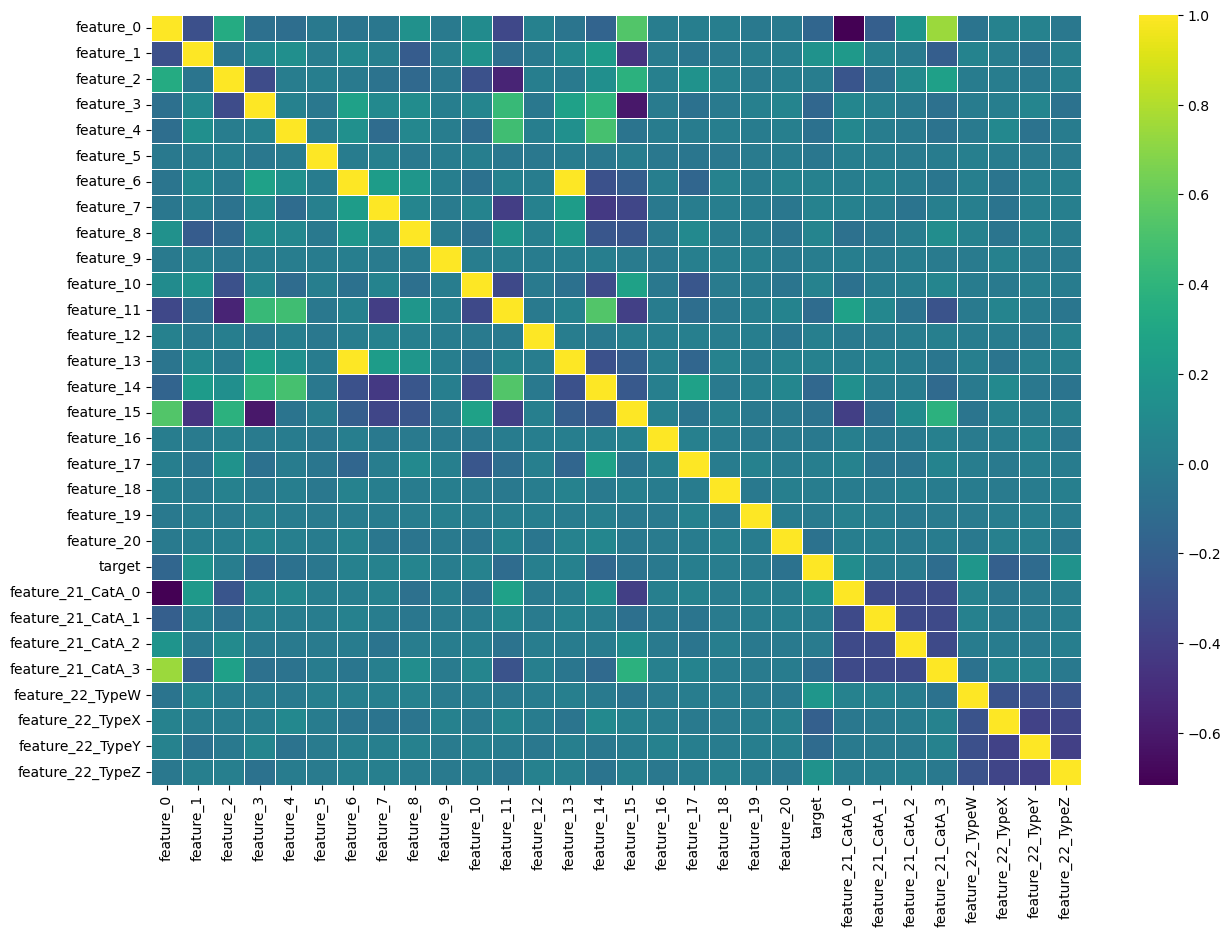

In [13]:
encoded_correlations = df_clasifiaction_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(encoded_correlations, linewidth=.5, cmap='viridis')
plt.show()

In [14]:
encoded_correlations["target"]

feature_0           -0.157467
feature_1            0.149550
feature_2            0.006169
feature_3           -0.150950
feature_4           -0.075103
feature_5           -0.036132
feature_6            0.030002
feature_7            0.040921
feature_8            0.055273
feature_9            0.006719
feature_10           0.035143
feature_11          -0.118279
feature_12           0.018998
feature_13           0.030002
feature_14          -0.144089
feature_15          -0.059686
feature_16          -0.019510
feature_17           0.010047
feature_18           0.001890
feature_19          -0.010549
feature_20          -0.068571
target               1.000000
feature_21_CatA_0    0.114063
feature_21_CatA_1   -0.000246
feature_21_CatA_2   -0.007144
feature_21_CatA_3   -0.106673
feature_22_TypeW     0.188940
feature_22_TypeX    -0.196842
feature_22_TypeY    -0.124254
feature_22_TypeZ     0.159209
Name: target, dtype: float64

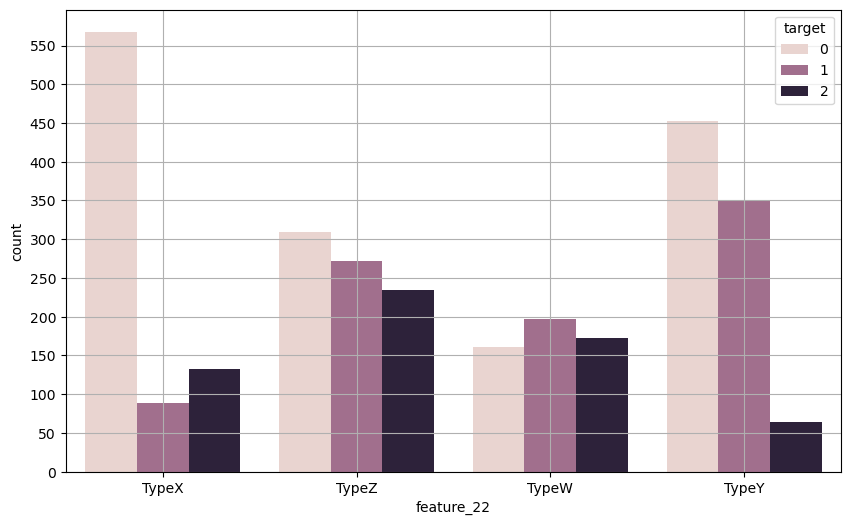

In [15]:
# Visualització feature_22
plt.figure(figsize=(10,6))
sns.countplot(data=df_clasifiaction, x='feature_22', hue='target')
plt.yticks(np.arange(0, 600, 50))
plt.grid()
plt.show()

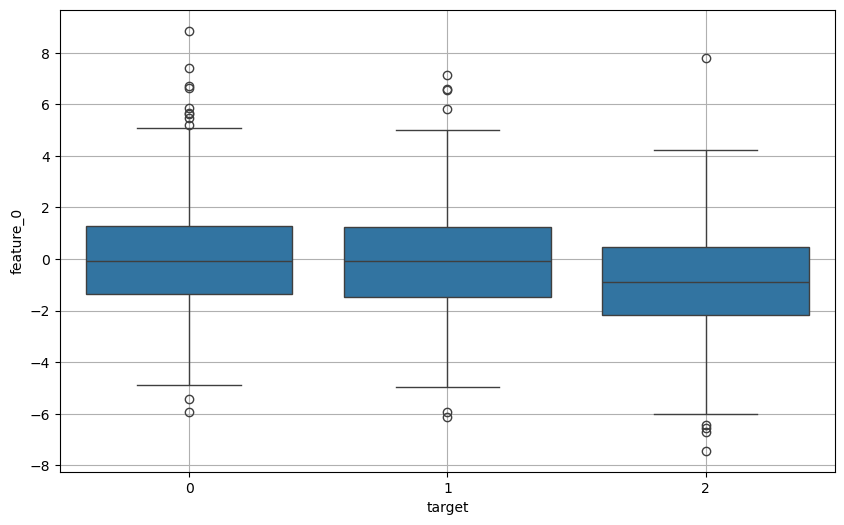

In [16]:
# Visualització feature_0
plt.figure(figsize=(10,6))
boxplot=sns.boxplot(data=df_clasifiaction, x='target', y='feature_0')
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Justificació el·lecció de columnes** -> Com a columna numèrica s'ha escollit 'feature_0' i com a columna categòrica s'ha escollit 'feature_22'. D'entre totes les variables numèriques, 'feature_0' té la correlació més forta amb 'target' i d'entre les variables categòriques 'feature_22' és la que té una correlació més forta amb 'target'. Si s'observa la correlació de 'feature_22_TypeX' (columna que s'ha creat en el procés de codificació amb _One-Hot_) és pot veure que aquesta variable és la que té una correlació major amb la variabñe 'target' i per tant la variable categòrica 'feature_22' és considera que té una forta influència en la predicció de 'target'.

**feature_0** -> La classe 0 i la classe 1 tenen la mediana molt propera a 0, això indica que la meitat dels valors, aproximadament, d'aquestes classes seran inferiors o iguals a 0 i l'altra meitat seràn 0 o superiors. Per la classe 2 es pot observar una clara diferència en la mediana, ja que aquesta es troba en els valors negatius, aproximadament -1. Això indica que la meitat de les dades seràn inferiors o iguals a -1 i l'altra meitat seràn -1 o superior.

Les 3 classes tenen la mediana al mig de la caixa, cosa que indica que les dades són simètriques.

Pel que fa al rang interquartíl·lic, totes 3 categories presentent un IQR bastant paregut (mida de les caixes), però la tendència negativa de la classe 2 fa que destaqui sobre les altres dues classes.

Totes 3 classes tenen _outliers_. La classe 0 té un gran nombre d'ells per sobre del bigoti superior mentre que la classe 2 concentra la majoria de valors atípics per sota del bigoti inferior.

**feature_22** -> Es pot observar que target = 0 és la classe dominant en totes les categories de 'feature_22' menys en "TypeW".

També s'observa que en "TypeX" i "TypeY" la classe target = 2 té una presència molt baixa i que per a totes les categories la classe target = 2 és la classe menys predominant.

"TypeW" és l'unica categoria on target = 1 domina.

"TypeZ" és la categoria que mostra una distribució més equitativa de les classes de target.
</div>

**Consultes externes:**

[JMP.STATISTICAL DISCOVERY.(nd)._Diagrama de caja_.JMP.STATISTICAL DISCOVERY](https://www.jmp.com/es/statistics-knowledge-portal/exploratory-data-analysis/box-plot)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

7. **Anàlisi Crítica:** Basant-te únicament en les troballes de la teva EDA (distribució de classes, tipus de variables, etc.), discuteix els principals desafiaments que anticipes que aquest dataset podria presentar per als algorismes de classificació estàndard. Com creus que el desequilibri observat podria afectar l'avaluació del rendiment?
8. D'acord amb l'anterior, realitza el que consideris necessari per preparar les dades per efectuar el procés de classificació de forma adequada. Recorda prendre les mesures necessàries per evitar biaixos, sobreajustament, fuga de dades, etc. Justifica cadascuna de les decisions preses.
&nbsp; &nbsp;
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:

**L'explicació del perquè s'han aplicat els canvis que s'han aplicat a les dades està a la cèl·la d'anàlisi**
</h4>
</div>

In [19]:
# 8 -> Preparació de dades
# Split train/test
from sklearn.model_selection import train_test_split
X = df_clasifiaction_encoded.drop("target", axis=1)
y = df_clasifiaction_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
) # stratify per mantenir la proporcio de classes

In [20]:
# SMOTE per equilibrar el dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [21]:
# Tractament de valors atípics amb RobustScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_balanced_no_outliers = scaler.fit_transform(X_train_balanced)
X_test_no_outliers = scaler.transform(X_test)

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Anàlisi crítica** -> El fet de tenir les classes desequilibrades, comporta un fort desafiament per als algorismes de classificació, ja que aquests tendeixen a predir la classe amb més mostres per així augmentar la accuracy, per tant, amb el dataset desequilibrat, aquesta mètrica i aquelles que se'n derivin podríen estar donant resultats falsos.

Un model que predigui de manera excel·lent la classe majoritària i tingui una accuracy molt elevada pot ser igualment un model nefast, ja que serà molt bo predient la classe amb més mostres, però serà un model completament inservible per les altres classes.

Un altre desafiament, són els valors atípics (_outliers_), perquè aquests poden fer que els models aprenguin malament i, per tant, esbiaixin, els resultats.

**Justificacions:**

- Separació del dataset en els conjunts d'entrenament i test -> És molt important separar els conjunts d'entrenament i test abans d'utilitzar cap tècnica de resampling per evitar que les dades "artificials" que l'algorisme crearà per equilibrar les classes minoritàries es filtrin al conjunt de testing. És a dir, és important separar abans d'equilibrar per assegurar-se que en el conjunt de test només hi ha dades reals. D'aquesta manera s'evita la fuga de dades.

- Aplicació de SMOTE -> S'ha decidit utilitzar la tècnica SMOTE per equilibrar les dades d'entrenament, ja que SMOTE és una tècnica de oversampling que crea mostres sintètiques en les classes minoritàries basant-se en les dades que té disponibles. D'aquesta manera s'evita la creació de dades "extranyes" per a les dades que ja es tenen. Cal posar en relleu que SMOTE no és un algorisme que faci còpies de les dades disponibles, sinó que utilitza la tècnica dels veïns més propers per crear noves dades en les classes minoritàries.

- Ús de RobustScaler -> A diferència d'altres tipus de scalers, RobustScaler no és sensible als outliers. Altres com StandardScaler o MinxaxScaler són mètodes d'escalat molt sensibles als valors atípics.
</div>

**Consultes externes:**

[Pandas.(nd)._pandas.DataFrame.drop_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

[scikit-learn.(nd)._train_test_split_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[scikit-learn.(nd)._RobustScaler_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

[imbalanced-learn.(nd)._SMOTE_.imbalanced-learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

[Sarp Nalcin.(11/10/2022)._StandardScaler vs. MinMaxScaler vs. RobustScaler: Which one to use for your next ML project?_.Medium](https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9)

[likebupt, PeterCLu, v-chmccl.()._SMOTE_.Microsoft](https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote?view=azureml-api-2#more-about-smote)

### 1.2. Entrenament i Avaluació de Models Base (0.5 punts)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Entrena amb el conjunt de dades d'entrenament i valida amb el conjunt de dades de validació els següents models base (Guarda les prediccions per al seu ús més endavant):
   * Regressió Logística (`LogisticRegression`)
   * Arbre de Decisió (`DecisionTreeClassifier`)
   * K veïns més propers (`KNeighborsClassifier`)
   * Classificador Naive Bayes (`GaussianNB`)
2. Per a cada model, reporta les següents mètriques obtingudes de la validació: Precision macro / recall macro / F1 macro (mitjana simple entre classes), Precision weighted / F1 weighted (mitjana ponderada segons el nombre de mostres per classe), F1 micro (mètrica total). Mostra també la matriu de confusió.
3. **Anàlisi Crítica:** Estableix aquests resultats com la teva línia base (baseline). Quina de les mètriques F1 (macro o weighted) consideres més informativa per avaluar el rendiment en aquest dataset específic i per què? Justifica la teva resposta relacionant-la amb el desequilibri de classes observat a la teva EDA. Comenta breument el rendiment d'aquests models base, parant especial atenció a com funcionen per a les classes minoritàries (observa les teves matrius de confusió).

</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Model logistic
model_regresion = LogisticRegression(random_state=42)
model_regresion.fit(X_train_balanced_no_outliers, y_train_balanced)
regression_predictions = model_regresion.predict(X_test_no_outliers)
print("---------- Model de regressió logística ----------")
print(classification_report(y_test, regression_predictions))

---------- Model de regressió logística ----------
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       298
           1       0.62      0.67      0.65       181
           2       0.49      0.40      0.45       121

    accuracy                           0.66       600
   macro avg       0.62      0.61      0.61       600
weighted avg       0.65      0.66      0.65       600



In [23]:
# Arbre de decisió
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_balanced_no_outliers, y_train_balanced)
tree_predictions = tree.predict(X_test_no_outliers)
print("---------- Classificador d'arbre de decisió ----------")
print(classification_report(y_test, tree_predictions))

---------- Classificador d'arbre de decisió ----------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       298
           1       0.61      0.68      0.64       181
           2       0.41      0.40      0.41       121

    accuracy                           0.62       600
   macro avg       0.58      0.59      0.58       600
weighted avg       0.63      0.62      0.63       600



In [24]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_balanced_no_outliers, y_train_balanced)
knn_predictions = knn.predict(X_test_no_outliers)
print("---------- KNN ----------")
print(classification_report(y_test, knn_predictions))

---------- KNN ----------
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       298
           1       0.67      0.78      0.72       181
           2       0.54      0.60      0.56       121

    accuracy                           0.72       600
   macro avg       0.69      0.70      0.69       600
weighted avg       0.74      0.72      0.72       600



In [25]:
# Bayes
bayes = GaussianNB()
bayes.fit(X_train_balanced_no_outliers, y_train_balanced)
bayes_predictions = bayes.predict(X_test_no_outliers)
print("---------- Naive Bayes ----------")
print(classification_report(y_test, bayes_predictions))

---------- Naive Bayes ----------
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       298
           1       0.61      0.62      0.62       181
           2       0.42      0.57      0.48       121

    accuracy                           0.62       600
   macro avg       0.60      0.61      0.60       600
weighted avg       0.65      0.62      0.63       600



---------- Mètriques model de regressió logística ----------
Precision macro =  0.6150150666588424
Recall macro =  0.6072630375432583
F1 macro =  0.6093259871441689
Precision weighted =  0.6487386369713681
F1 weighted =  0.6506466299357209
F1 micro =  0.655


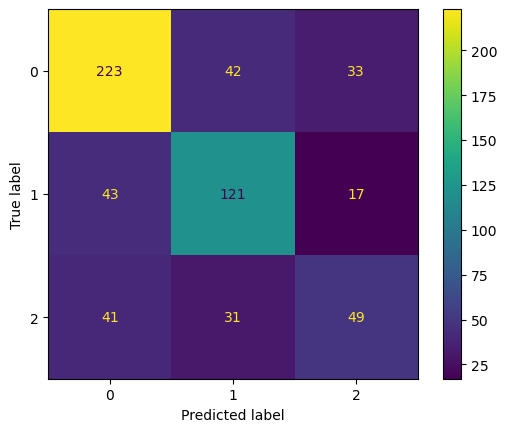

In [26]:
# Mètriques
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("---------- Mètriques model de regressió logística ----------")
print(f"Precision macro = ", precision_score(y_test, regression_predictions, average="macro"))
print(f"Recall macro = ", recall_score(y_test, regression_predictions, average="macro"))
print(f"F1 macro = ", f1_score(y_test, regression_predictions, average="macro"))
print(f"Precision weighted = ", precision_score(y_test, regression_predictions, average="weighted"))
print(f"F1 weighted = ",f1_score(y_test, regression_predictions, average="weighted"))
print(f"F1 micro = ", f1_score(y_test, regression_predictions, average="micro"))
ConfusionMatrixDisplay.from_predictions(y_test, regression_predictions)

---------- Mètriques arbre de decisió ----------
Precision macro =  0.5826306210899145
Recall macro =  0.5885749141423164
F1 macro =  0.5846064814814814
Precision weighted =  0.6284963278290725
F1 weighted =  0.625683449074074
F1 micro =  0.625


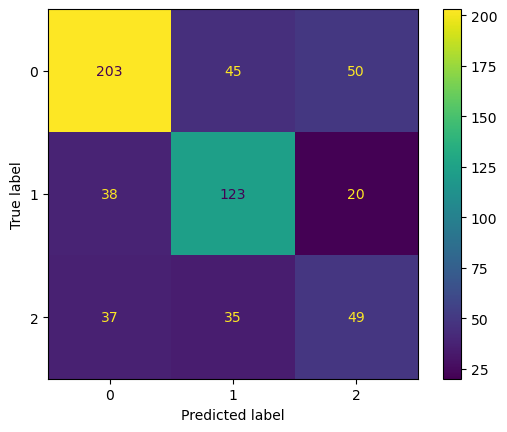

In [27]:
print("---------- Mètriques arbre de decisió ----------")
print(f"Precision macro = ", precision_score(y_test, tree_predictions, average="macro"))
print(f"Recall macro = ", recall_score(y_test, tree_predictions, average="macro"))
print(f"F1 macro = ", f1_score(y_test, tree_predictions, average="macro"))
print(f"Precision weighted = ", precision_score(y_test, tree_predictions, average="weighted"))
print(f"F1 weighted = ",f1_score(y_test, tree_predictions, average="weighted"))
print(f"F1 micro = ", f1_score(y_test, tree_predictions, average="micro"))
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions)

---------- Mètriques KNN ----------
Precision macro =  0.688464156708657
Recall macro =  0.7037051110718183
F1 macro =  0.6924024217497596
Precision weighted =  0.7366909232621619
F1 weighted =  0.7241753425786732
F1 micro =  0.72


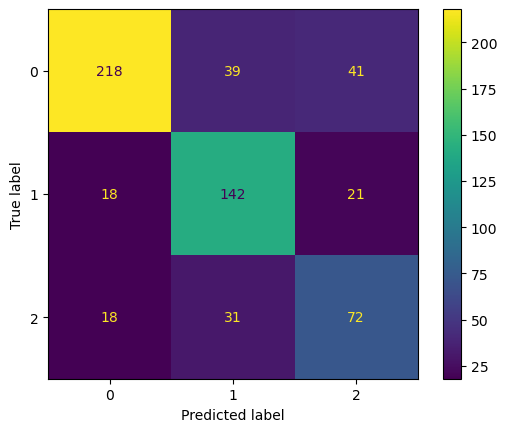

In [28]:
print("---------- Mètriques KNN ----------")
print(f"Precision macro = ", precision_score(y_test, knn_predictions, average="macro"))
print(f"Recall macro = ", recall_score(y_test, knn_predictions, average="macro"))
print(f"F1 macro = ", f1_score(y_test, knn_predictions, average="macro"))
print(f"Precision weighted = ", precision_score(y_test, knn_predictions, average="weighted"))
print(f"F1 weighted = ",f1_score(y_test, knn_predictions, average="weighted"))
print(f"F1 micro = ", f1_score(y_test, knn_predictions, average="micro"))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)

---------- Mètriques model bayesià ----------
Precision macro =  0.5962536362458632
Recall macro =  0.6107137395889802
F1 macro =  0.5976732172977236
Precision weighted =  0.646586539707216
F1 weighted =  0.6281086925617408
F1 micro =  0.62


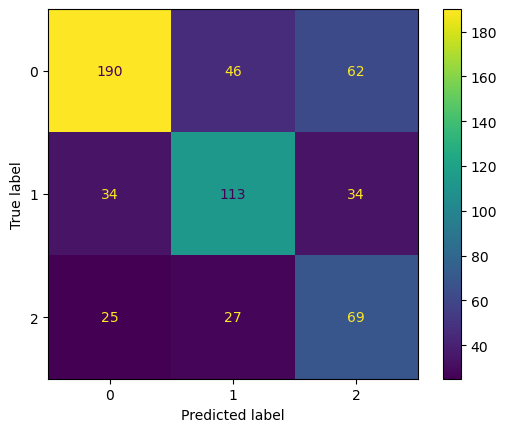

In [29]:
print("---------- Mètriques model bayesià ----------")
print(f"Precision macro = ", precision_score(y_test, bayes_predictions, average="macro"))
print(f"Recall macro = ", recall_score(y_test, bayes_predictions, average="macro"))
print(f"F1 macro = ", f1_score(y_test, bayes_predictions, average="macro"))
print(f"Precision weighted = ", precision_score(y_test, bayes_predictions, average="weighted"))
print(f"F1 weighted = ",f1_score(y_test, bayes_predictions, average="weighted"))
print(f"F1 micro = ", f1_score(y_test, bayes_predictions, average="micro"))
ConfusionMatrixDisplay.from_predictions(y_test, bayes_predictions)

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Millor F1** -> Es considera que la mètrica F1 macro és millor que la F1 weighted ja que en l'anàlisi exploratòri es va observar un fort desequilibri entre les classes de la variable _target_. Cal recordar que la classe 0 era la classe amb més mostres, seguida de la classe 1 i amb la classe 2 com la classe amb menys mostres. La mètrica F1 amb mitjana macro tracta totes les classes per igual sense tenir en compte la quantitat de mostres de cadascuna, mentre que la mètrica F1 amb mitjana weighted sí que té en compte el nombre de mostres de cada classe.

Per enraonar sobre quina mètrica mitjana és millor per la mètrica F1, cal fixar-se en les dades abans d'aplicar l'equilibri, ja que SMOTE només s'ha aplicat a les dades d'entrenament.

**Rendiment dels models** -> Pel que fa al rendiment dels models, cal destacar que cap d'ells està per sota del 50% de F1, per tant, no hi ha cap model aleatori. Cap dels classificadors es pot considerar bo ja que ningun té una puntuació d'un 70%, com a mínim. Tot i que aquest valor del 70% és per gust personal i experiència laboral.

Els model bayesià i l'arbre de decisió són els dos amb menys scoring i el model KNN és el que millor F1 macro té amb un 69%.
</div>

**Consultes externes:**

[scikit-learn.(nd)._LogisticRegression_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[scikit-learn.(nd)._classification_report_.scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html)

[scikit-learn.(nd)._DecisionTreeClassifier_.scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[scikit-learn.(nd)._KNeighborsClassifier_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[scikit-learn.(nd)._GaussianNB_.scikit-learn](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html)

[scikit-learn.(nd)._ConfusionMatrixDisplay_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

[scikit-learn.(nd)._confusion_matrix_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[scikit-learn.(nd)._f1_score_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

[scikit-learn.(nd)._recall_score_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

[scikit-learn.(nd)._precision_score_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

[Kenneth Leung.(04/01/2023)._Micro, Macro & Weighted Averages of F1 Score, Clearly Explained_.KDnuggets](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html)

### 1.3. Combinació paral·lela de classificadors de base similar: Bagging (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Implementa `RandomForestClassifier`.
2. Realitza una cerca i ajust (tuning) d'hiperparàmetres clau (n_estimators, max_depth, max_features) utilitzant validació creuada (ex., GridSearchCV o RandomizedSearchCV amb 5-CV). Defineix un rang de cerca raonable per a cada hiperparàmetre i fes servir la mètrica F1 que vas justificar com a més informativa en el punt anterior per a l'optimització.
3. Reporta els millors hiperparàmetres trobats i l'score de validació creuada obtingut amb ells.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [30]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier()
params = {'n_estimators': [100, 200, 300, 400], 'max_depth': list(range(10,20)), 'max_features': ["sqrt", "log2", None]}
grid = GridSearchCV(estimator=random_forest, param_grid=params, cv=5, scoring='f1_macro', return_train_score=True, n_jobs=-1)
grid.fit(X_train_balanced_no_outliers, y_train_balanced)
print(grid.best_params_)

{'max_depth': 19, 'max_features': 'log2', 'n_estimators': 300}


In [31]:
# Millor F1 score macro
print(f"Millor F1 score macro = {grid.best_score_}")

Millor F1 score macro = 0.8801455524544985


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

S'observa que la millor combinació de paràmetres és un profunditat màxima de 19, 'sqrt' com max_features i 300 estimators (arbres en del bosc)

Aquesta combinació de paràmetres dóna una F1 score macro del 88,06%, aproximadament. Això demostra la clara superioritat del Random Forest amb la resta de models que s'han entrenat anteriorment.

</div>

**Consultes externes:**

[scikit-learn.(nd)._RandomForestClassifier_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[scikit-learn.(nd)._GridSearchCV_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

4. Valida (amb el conjunt de dades de validació) el model Random Forest final (entrenat amb els millors hiperparàmetres sobre tot el conjunt d'entrenament).
5. Mostra un gràfic de la importància de les característiques (feature_importance_) del model final.
6. **Anàlisi Crítica:** Compara el rendiment del teu Random Forest optimitzat amb els models base (refereix-te als valors específics de les mètriques que vas obtenir). Va aconseguir RF una millora substancial, especialment en les classes minoritàries? Analitza el teu gràfic d'importància de característiques: Quines variables semblen ser les més rellevants segons RF? Té sentit aquest resultat considerant que el dataset és sintètic i es va dissenyar amb variables informatives, redundants i irrellevants? Identifica RF algunes de les variables categòriques o d'interacció que vam afegir com a importants?
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Millor model
random_forest_optimal = RandomForestClassifier(n_estimators=300, max_depth=19, max_features='sqrt')
random_forest_optimal.fit(X_train_balanced_no_outliers, y_train_balanced)
random_forest_predictions = random_forest_optimal.predict(X_test_no_outliers)
print("---------- Classificador Random Forest ----------")
print(classification_report(y_test, random_forest_predictions))

---------- Classificador Random Forest ----------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       298
           1       0.75      0.82      0.78       181
           2       0.78      0.59      0.67       121

    accuracy                           0.79       600
   macro avg       0.78      0.76      0.77       600
weighted avg       0.79      0.79      0.79       600



In [33]:
feature_importance = random_forest_optimal.feature_importances_
feature_importance

array([0.04675287, 0.05942405, 0.04535592, 0.06320138, 0.07952984,
       0.02231538, 0.03911708, 0.05150416, 0.05529877, 0.02300177,
       0.04436944, 0.05093231, 0.02306506, 0.04112179, 0.0691894 ,
       0.03629971, 0.02187717, 0.04306101, 0.02265742, 0.0234583 ,
       0.02715658, 0.00544399, 0.00372623, 0.00525819, 0.0124401 ,
       0.00289224, 0.04487344, 0.03152616, 0.00515023])

In [34]:
cols = X_train.columns
series_features_importance = pd.Series(feature_importance, index=cols) # Lligar importancies amb features
series_features_importance_sorted = series_features_importance.sort_values()

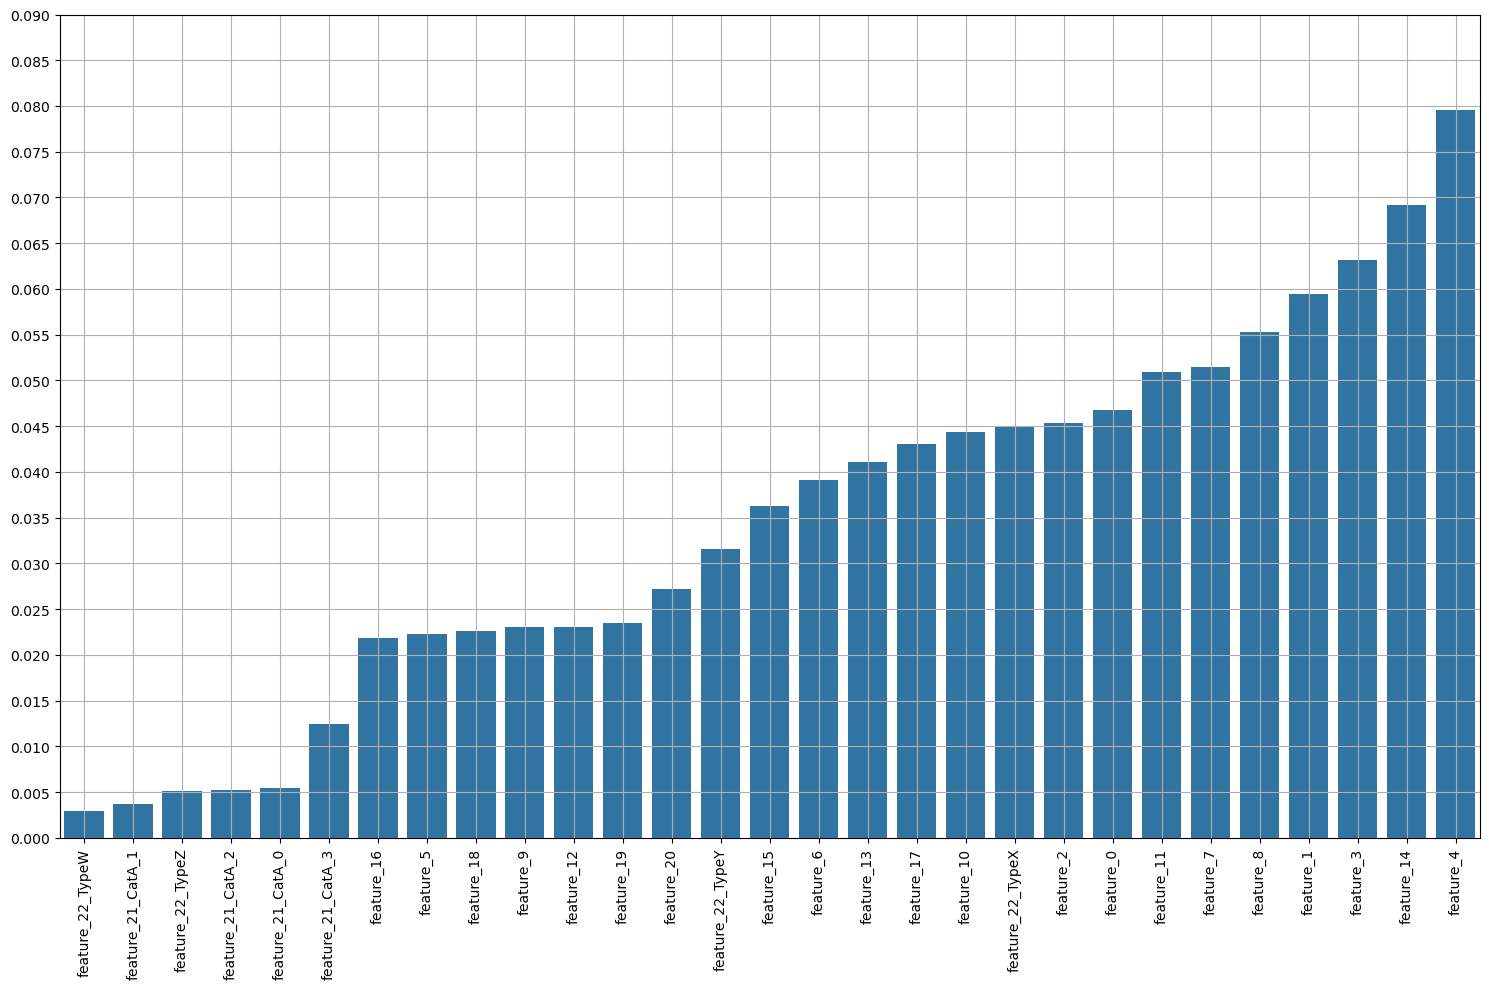

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(data=series_features_importance_sorted)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 0.095, 0.005))
plt.grid()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

El random Forest amb la millor combionació de paràmetres suposa una gran millora respecte a les F1 score macro dels models previs. Si es fa un ranking de més F1 score macro a menys es pot observar:

|Model||F1 score macro|
| --- | --- | --- |
|Ranfom Forest||0.88|
|KNN||0.69|
|Regressió logística||0.60|
|Bayes||0.59|
|Arbre de decisió||0.58|

Per tant, el random forest suposa una millora d'aproximadament el 21% respecte el model KNN.

Per saber si el Random Forest es millor amb les classes minoritàries cal mirar F1 weighted.

|Model||F1 score weighted|
| --- | --- | --- |
|Ranfom Forest||0.79|
|KNN||0.72|
|Regressió logística||0.65|
|Bayes||0.628|
|Arbre de decisió||0.626|

S'observa, en aquest cas, RandomForest també és el model amb millor puntuació.

El top 3 de variables més important són:
- 1 -> feature_4
- 2 -> feature_14
- 3 -> feature_3

El model Random Forest detecta les variables categòriques que es van codificar amb _One-Hot_, tot i que menys dues, les marca totes com les variables menys importants. _feature_22_TypeX_ és la primera amb més importància ocupant el 9º lloc en la classificació general i _feature_22_TypeY_ és la segona més important ocupant el 16º lloc en la classificació general.

</div>

**Consultes externes:**

[scikit-learn.(nd)._RandomForestClassifier_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[scikit-learn.(nd)._GridSearchCV_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[Pandas.(nd)._pandas.Series_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

[Pandas.(nd)._pandas.DataFrame.sort_values_.Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

[Seaborn.(nd)._seaborn.barplot_.Seaborn](https://seaborn.pydata.org/generated/seaborn.barplot.html)

### 1.4. Combinació paral·lela de classificadors de base similar: Boosting (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Implementa `GradientBoostingClassifier`.
2. Realitza una cerca i ajust (tuning) d'hiperparàmetres clau utilitzant validació creuada. Defineix un rang de cerca raonable per a cada hiperparàmetre i fes servir la mètrica F1 seleccionada.
3. Reporta els millors hiperparàmetres trobats i l'score de validació creuada obtingut amb ells.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
params = {'n_estimators': [100, 200, 300, 400],
          'learning_rate': [0.1, 0.2, 0.3],
          'max_depth': list(range(10, 15))}
grid_gradient = GridSearchCV(estimator=gradient_boosting, param_grid=params, cv=5, scoring='f1_macro', return_train_score=True, n_jobs=-1)
grid_gradient.fit(X_train_balanced_no_outliers, y_train_balanced)
print(grid_gradient.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}


In [52]:
print(f"Millor F1 score macro = {grid_gradient.best_score_}")

Millor F1 score macro = 0.8983349185940268


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

La millor combinació de paràmetres és: 0.1 de _learning_rate_, una profunditat màxima de 10 i 400 _estimators_.

Aquesta combinació de paràmetres comporta una puntuació de validació creuada de 0.89 (89%).

</div>

**Consultes externes:**

[scikit-learn.(nd)._GradientBoostingClassifier_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

[GeeksForGeeks.(30/05/2025)._How to Tune Hyperparameters in Gradient Boosting Algorithm_.GeeksForGeeks](https://www.geeksforgeeks.org/how-to-tune-hyperparameters-in-gradient-boosting-algorithm/)

[AIML.com.(04/04/2025)._What are the key hyperparameters for a GBM model?_.AIML.com](https://aiml.com/what-are-the-key-hyper-parameters-for-a-gbm-model/)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

4. Valida (amb el conjunt de dades de validació) el model final.
5. Mostra un gràfic de la importància de les característiques d'aquest model.
6. **Anàlisi Crítica:** Compara el rendiment del teu Gradient Boosting optimitzat amb els models anteriors. Va aconseguir una millora substancial, especialment en les classes minoritàries? Analitza el teu gràfic d'importància de característiques: Existeixen diferències notables en el rànquing o en les variables considerades més importants pels models boosting en comparació amb Random Forest
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gradient_optimal = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, n_estimators=400, random_state=42)
gradient_optimal.fit(X_train_balanced_no_outliers, y_train_balanced)
gradient_predictions = gradient_optimal.predict(X_test_no_outliers)
print(classification_report(y_test, gradient_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       298
           1       0.79      0.87      0.83       181
           2       0.84      0.60      0.70       121

    accuracy                           0.82       600
   macro avg       0.82      0.79      0.80       600
weighted avg       0.83      0.82      0.82       600



In [38]:
feature_importance_gradient = gradient_optimal.feature_importances_
cols = X_train.columns
series_features_importance_gradient = pd.Series(feature_importance_gradient, index=cols) # Lligar importancies amb features
series_features_importance_gradient_sorted = series_features_importance_gradient.sort_values()

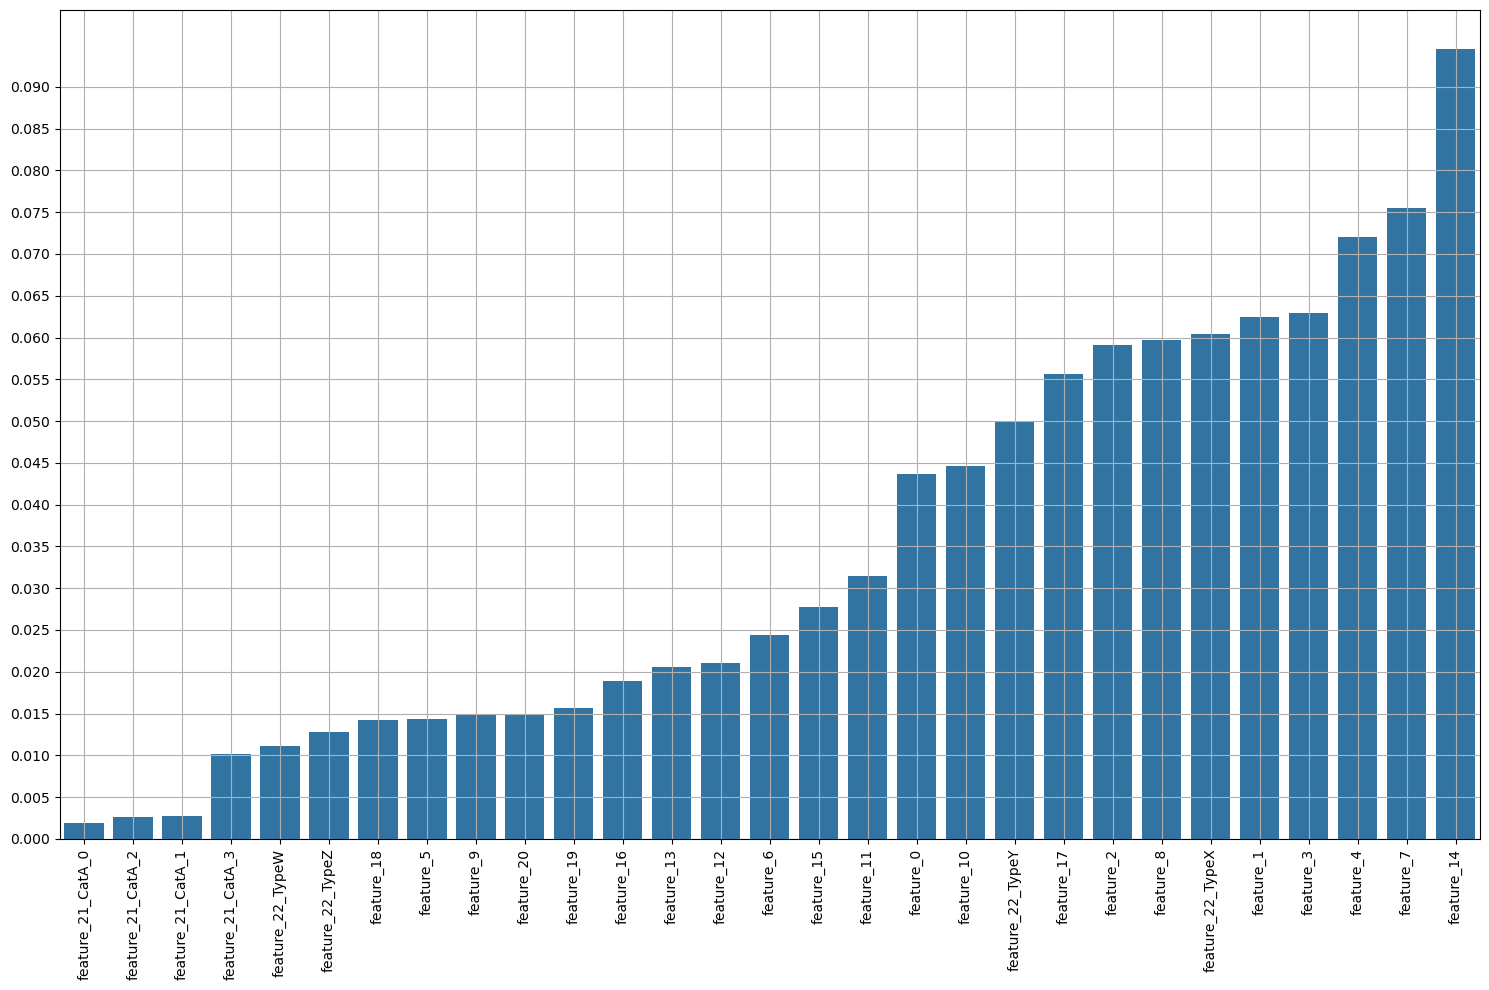

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(data=series_features_importance_gradient_sorted)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 0.095, 0.005))
plt.grid()
plt.tight_layout()
plt.show()

---------- Mètriques F1 + matriu de confusió GradientBoostingClassifier ----------
F1 macro =  0.7982406594349776
F1 weighted =  0.8210023743422487


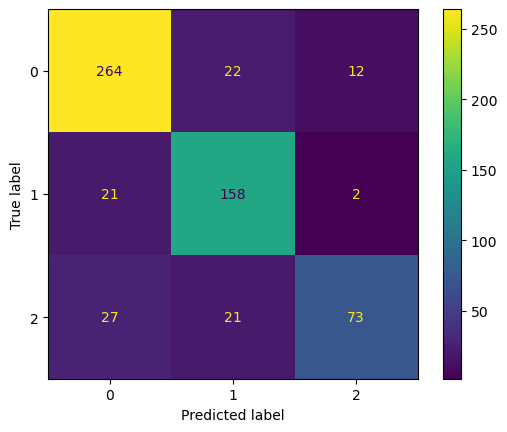

In [40]:
print("---------- Mètriques F1 + matriu de confusió GradientBoostingClassifier ----------")
print(f"F1 macro = ", f1_score(y_test, gradient_predictions, average="macro"))
print(f"F1 weighted = ",f1_score(y_test, gradient_predictions, average="weighted"))
ConfusionMatrixDisplay.from_predictions(y_test, gradient_predictions)

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Si es compara la mètrica F1 macro amb els models anteriors, es pot observar que el _GradientBoostingClassifier_ suposa una millora respecte a quasi tots els models.

|Model||F1 score macro|
| --- | --- | --- |
|Ranfom Forest||0.88|
|GradientBoostingClassifier||0.79|
|KNN||0.69|
|Regressió logística||0.60|
|Bayes||0.59|
|Arbre de decisió||0.58|

En la taula anterior es pot observar que el _GradientBoostingClassifier_ queda en segon lloc per darrere del _Random Forest_.

Si s'observa el gràfic d'importància, es pot observar que que el _GradientBoostingClassifier_ aconsegueix una petita millora en les classes minoritàries, ja que  _feature_22_TypeX_ ara està en la 6ª posició d'importància (en el _Random Forest_ òptim estava en la 9ª posició) _feature_22_TypeY_ ara està en la 10ª posició d'importància (en el _Random Forest_ òptim estava en la 16ª posició).

Per veure, més en general, la millora en les classes minoritàries, s'observa la F1 weighted:

|Model||F1 score weighted|
| --- | --- | --- |
|GradientBoostingClassifier||0.82|
|Ranfom Forest||0.79|
|KNN||0.72|
|Regressió logística||0.65|
|Bayes||0.628|
|Arbre de decisió||0.626|

Observant la taula, es confirma que que _GradientBoostingClassifier_ suposa una millora en les classe minoritàries.
</div>

### 1.5. Combinació seqüencial de classificadors de base diferent: Stacking (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Implementa `StackingClassifier`.
2. Utilitza els models base implementats a la secció 1.2 Creus que aquesta combinació de models és diversa i adequada per a Stacking?
3. Tria un meta-classificador. Pots optar per fer servir els hiperparàmetres per defecte o realitzar un petit ajust si ho consideres necessari.
4. Valida el `StackingClassifier` complet fent servir les dades de validació amb la mètrica F1 seleccionada. Reporta l'score.
5. **Anàlisi Crítica:** Compara el rendiment del teu model de Stacking amb el millor resultat que vas obtenir d'un ensemble individual (RF o Boosting) en els passos anteriors. Va aportar Stacking una millora significativa del rendiment en aquest dataset? Explica breument com creus que el meta-classificador està utilitzant les prediccions dels teus base learners escollits.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [41]:
from sklearn.ensemble import StackingClassifier
logistic_model_stacking = LogisticRegression(random_state=42)
tree_model_stacking = DecisionTreeClassifier(random_state=42)
knn_model_stacking = KNeighborsClassifier()
bayes_model_stacking = GaussianNB()
estimators = [("reg_log", logistic_model_stacking), ("dec_tree", tree_model_stacking), ("knn", knn_model_stacking), ("bayes", bayes_model_stacking)]
stacking = StackingClassifier(estimators=estimators, cv=5, n_jobs =-1)
stacking.fit(X_train_balanced_no_outliers, y_train_balanced)

StackingClassifier(cv=5,
                   estimators=[('reg_log', LogisticRegression(random_state=42)),
                               ('dec_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('bayes', GaussianNB())],
                   n_jobs=-1)

In [42]:
stacking_predictions = stacking.predict(X_test_no_outliers)
print(classification_report(y_test, stacking_predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       298
           1       0.71      0.79      0.75       181
           2       0.61      0.54      0.57       121

    accuracy                           0.75       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.75      0.75      0.74       600



---------- Mètriques F1 + matriu de confusió StackingClassifier ----------
F1 macro =  0.7111870217542648
F1 weighted =  0.7447311667384158


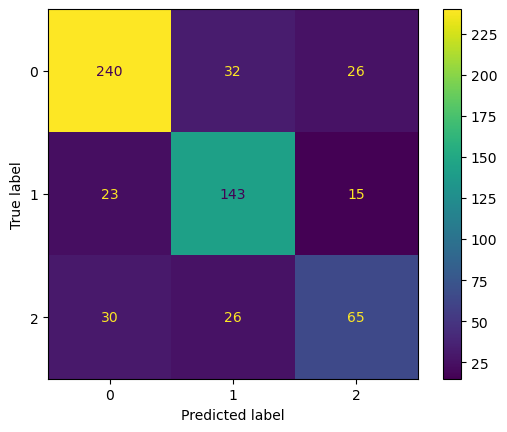

In [43]:
print("---------- Mètriques F1 + matriu de confusió StackingClassifier ----------")
print(f"F1 macro = ", f1_score(y_test, stacking_predictions, average="macro"))
print(f"F1 weighted = ",f1_score(y_test, stacking_predictions, average="weighted"))
ConfusionMatrixDisplay.from_predictions(y_test, stacking_predictions)

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Adequació de la combinació de models** -> És considera correcta la combinació de models atès que cadascun aporta una estratègia diferent. El model logístic és un model lineal, l'arbre de decisió és un model no lineal, el KNN és un model basat en distàncies i el model bayesià és un model basat en probabilitats.

**Anàlisi StackingClassifier**-> És compararà el rendiment amb el model _boosting_. Tot i no tenir la millor F1 macro és el que millor es comporta amb les classes minoritàries, per això es considera millor.

|Model||F1 score macro|
| --- | --- | --- |
|GradientBoostingClassifier||0.79|
|StackingClassifier||0.71|

|Model||F1 score weighted|
| --- | --- | --- |
|GradientBoostingClassifier||0.82|
|StackingClassifier||0.74|

Com es pot observar, el model _StackingClassifier_ té unes mètriques F1 inferiors a les del model _GradientBoostingClassifier_. En les matrius de confusió d'ambdós models és pot observar també, la superioritat del model _GradientBoostingClassifier_.

</div>

**Consultes externes:**

[scikit-learn.(nd)._StackingClassifier_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

### 1.6. Combinació seqüencial de classificadors de base diferent: Cascading (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Combina en cascada els models base implementats a la secció 1.2. Tingues en compte la definició presentada en el document "Combinació de models - PID_00296757, Jordi Casas Roma i Julià Minguillón Alfonso" que es troba als recursos de l'assignatura. Utilitza les prediccions obtingudes a la secció 1.2 Creus que aquesta combinació de models és diversa i adequada per a Cascading?
3. Tria un meta-classificador. Pots optar per fer servir els hiperparàmetres per defecte o realitzar un petit ajust si ho consideres necessari.
4. Valida el teu classificador en cascada complet fent servir les dades de validació amb la mètrica F1 seleccionada. Reporta l'score.
5. **Anàlisi Crítica:** Compara el rendiment del teu model en cascada amb el millor resultat obtingut en els passos anteriors. Va aportar Cascading una millora significativa del rendiment en aquest dataset? Vas observar algun avantatge en termes d'eficiència computacional?
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [160]:
# Juntar decision parcials (prediccions) dels models base amb dades originals
X_test_cascading = np.column_stack((X_test_no_outliers, # Primera dimensio de shape igual per tots
                                   regression_predictions,
                                   tree_predictions,
                                   knn_predictions,
                                   bayes_predictions)
)

In [156]:
X_training_cascading = np.column_stack( # Primera dimensio de shape igual per tots -> Predir dades entrenament
    (X_train_balanced_no_outliers, # Shape -> (3576, 29)
    model_regresion.predict(X_train_balanced_no_outliers),
    tree.predict(X_train_balanced_no_outliers),
    knn.predict(X_train_balanced_no_outliers),
    bayes.predict(X_train_balanced_no_outliers))
)

In [150]:
 print(model_regresion.predict(X_train_balanced_no_outliers).shape)
 print(X_train_balanced_no_outliers.shape)

(3576,)
(3576, 29)


In [157]:
from sklearn.model_selection import cross_validate
# Meta classificador GradientBoosting òptim (anteriorment entrenat) perquè és el que millors resultats ha donat amb les classes minoritaries
boosting_meta_classifier = GradientBoostingClassifier()
boosting_meta_classifier.fit(X_training_cascading, y_train_balanced)

GradientBoostingClassifier()

In [159]:
meta_classifier_predictions = boosting_meta_classifier.predict(X_test_cascading)
print(classification_report(y_test, meta_classifier_predictions))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       298
           1       0.61      0.68      0.64       181
           2       0.41      0.40      0.41       121

    accuracy                           0.62       600
   macro avg       0.58      0.59      0.58       600
weighted avg       0.63      0.62      0.63       600



<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Adequació de la combinació de classificadors** -> Es considera correcta la combinació de models atès que cadascun aporta una estratègia diferent. El model logístic és un model lineal, l'arbre de decisió és un model no lineal, el KNN és un model basat en distàncies i el model bayesià és un model basat en probabilitats.

**Comparació de resultats** ->

|Model||F1 score macro|
| --- | --- | --- |
|Ranfom Forest||0.88|
|GradientBoostingClassifier||0.79|
|StackingClassifier||0.71|
|KNN||0.69|
|Regressió logística||0.60|
|Bayes||0.59|
|Meta-classifier||0.58|
|Arbre de decisió||0.58|

Es pot observar que el model en cascada no es comporta del tot com caldria esperar (almenys per gust personal), ja que la seva F1_macro es troba no solament per sota del 70% sinó que de tots els models que s'han entrenat anteriorment, el model en _meta-classifier_ és el 7º de 8.

**Avantatges computacionals** -> L'únic avantatge observat, en termes computacionals, és la rapidesa d'entrenament. El model en _meta-classifier_ ha estat més ràpid que el model _stacking_.


</div>

**Consultes externes:**

[scikit-learn.(nd)._cross_val_score_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

[1938.com.es.(nd)._Series temporales y combinación de clasificadores_.1938.com.es](https://1938.com.es/modelos_combinados)

[Numpy.(nd)._numpy.column_stack_.Numpy](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

5. Dissenya una estructura diferent de classificadors en cascada (ex., classificadors ràpids a la primera etapa per a descartar/classificar instàncies fàcils, i un de més complex a la segona per a les difícils).
5. **Anàlisi Crítica:** Compara el rendiment d'aquest nou model en cascada amb els resultats obtinguts en els passos anteriors. Vas observar algun avantatge en rendiment i/o eficiència computacional?
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [106]:
# Classificadors ràpids -> Model logístic i Bayes -> Fàcil = els dos models coincideixen en la predicció
# Classificador complex -> GradientBoostingClassifier -> Difícil = cal predir la dada amb el boosting
predictions_cascading = []
for X_data_index in range(0, len(X_test_no_outliers)):
    if regression_predictions[X_data_index] == bayes_predictions[X_data_index]: # Dada fàcil
        predictions_cascading.append(regression_predictions[X_data_index])
    else: # Dada difícil -> S'ha de predir amb boosting
        adapt_for_prediction = X_test_no_outliers[X_data_index].reshape(1, -1) # Per adaptar de 1D a 2D (ho requereix predict())
        boosting_pred = gradient_optimal.predict(adapt_for_prediction)
        predictions_cascading.append(boosting_pred[0]) # Cal agafar el [0] perque la predicció torna una llista

In [107]:
from sklearn.metrics import f1_score
f1_cascading = f1_score(y_test, predictions_cascading, average='macro')
f1_cascading

0.700071078496539

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Com a models ràpids s'han triat el model de regressió logística i el model bayesià, ja que després d'investigar s'ha pogut observar que son els més eficients en el seu entrenament.

Com a model complex s'ha triat el _GradientBoostingClassifier_ ja que de tots els anteriors ha estat el que millors resultats ha aportat en les classes minoritàries.

Com s'esmenta en els comentaris del codi que una instància sigui fàcil de classificar significa que els dos models ràpids han d'estar d'acord en la predicció i si una instànca es complexa de classificar (els models ràpids no coincideixen amb la predicció), el model complex s'encarregarà de fer la predicció. D'aquesta manera s'estalvien recursos i temps.

Si es compara el classificador amb cascada amb el meta-classificador, es pot observar una clara millora en la mètrica.

|Model||F1 score macro|
| --- | --- | --- |
|Cascading||0.70|
|Meta-classifier||0.58|


</div>

**Consultes externes:**

[Austin Capelia.(nd)._Classifier Cascades_.Real Python](https://realpython.com/lessons/classifier-cascades/#description)

[Brandon Wohlwend.(14/07/2023)._Classification Algorithms: KNN, Naive Bayes, and Logistic Regression_.Medium](https://medium.com/@brandon93.w/classification-algorithms-knn-naive-bayes-and-logistic-regression-515bdb085047)

[W3Schools.(nd)._NumPy Array Reshaping_.W3Schools](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp)

[scikit-learn.(nd)._f1_score_.scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

### 1.7. Comparació Global i Conclusions (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Crea una taula resum que compari clarament el rendiment (Accuracy, F1-macro, F1-weighted) de tots els models implementats (línies base i ensembles). Si és possible i rellevant, afegeix una columna amb el temps d'ajust/entrenament aproximat.
2. **Anàlisi Crítica Final:** Basant-te exclusivament en els resultats numèrics de la teva taula resum, quin paradigma d'ensemble learning (Bagging, Boosting, Stacking, Cascading) va demostrar el millor rendiment global per a aquest problema de classificació, especialment considerant el desequilibri de classes? Justifica la teva elecció referint-te a valors específics de la teva taula.
3. Discuteix els trade-offs que hagis pogut observar (ex., rendiment vs. complexitat del model, rendiment vs. temps d'entrenament/tuning).

**Reflexiona críticament:** Com creus que les diferents complexitats que vam buscar incloure en el dataset (no linealitat, interaccions, soroll, desequilibri, variables irrellevants) van poder influir en el rendiment relatiu dels algorismes que vas provar?&nbsp;
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [163]:
from sklearn.metrics import accuracy_score
models_info = {"Model": ["Logistic model", "Decision Tree", "KNN", "Bayes", "Random Forest (Bagging)", "Boosting",
                                 "Stacking", "Meta-classifier", "Cascading"],
                       "Accuracy": [accuracy_score(y_test, regression_predictions),
                                   accuracy_score(y_test, tree_predictions),
                                   accuracy_score(y_test, knn_predictions),
                                   accuracy_score(y_test, bayes_predictions),
                                   accuracy_score(y_test, random_forest_predictions),
                                   accuracy_score(y_test, gradient_predictions),
                                   accuracy_score(y_test, stacking_predictions),
                                   accuracy_score(y_test, meta_classifier_predictions),
                                   accuracy_score(y_test, predictions_cascading)],
                       "F1-macro": [f1_score(y_test, regression_predictions, average="macro"),
                                   f1_score(y_test, tree_predictions, average="macro"),
                                   f1_score(y_test, knn_predictions, average="macro"),
                                   f1_score(y_test, bayes_predictions, average="macro"),
                                   f1_score(y_test, random_forest_predictions, average="macro"),
                                   f1_score(y_test, gradient_predictions, average="macro"),
                                   f1_score(y_test, stacking_predictions, average="macro"),
                                   f1_score(y_test, meta_classifier_predictions, average="macro"),
                                   f1_score(y_test, predictions_cascading, average="macro")],
                       "F1-weighted": [f1_score(y_test, regression_predictions, average="weighted"),
                                      f1_score(y_test, tree_predictions, average="weighted"),
                                      f1_score(y_test, knn_predictions, average="weighted"),
                                      f1_score(y_test, bayes_predictions, average="weighted"),
                                      f1_score(y_test, random_forest_predictions, average="weighted"),
                                      f1_score(y_test, gradient_predictions, average="weighted"),
                                      f1_score(y_test, stacking_predictions, average="weighted"),
                                      f1_score(y_test, meta_classifier_predictions, average="weighted"),
                                      f1_score(y_test, predictions_cascading, average="weighted")]
              }
df_metrics = pd.DataFrame(data=models_info)

In [164]:
df_metrics

,Model,Accuracy,F1-macro,F1-weighted
0,Logistic model,0.655000,0.609326,0.650647
1,Decision Tree,0.625000,0.584606,0.625683
2,KNN,0.720000,0.692402,0.724175
3,Bayes,0.620000,0.597673,0.628109
4,Random Forest (Bagging),0.793333,0.765376,0.789894
5,Boosting,0.825000,0.798241,0.821002
6,Stacking,0.746667,0.711187,0.744731
7,Meta-classifier,0.625000,0.584606,0.625683
8,Cascading,0.731667,0.700071,0.729722


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Paradigma amb millors resultats** -> Basant-nos en els resultats numèrics de les mètriques, es pot observar que el millor model de tots els que s'han entrenat és el model _GradientBoostingClassifier_. Les tres mètriques són millors que les de qualsevol altre model. En el cas de l'_accuracy_, s'observa que el paradigma de _boosting_ té un 2% més que el segon amb més puntuació per aquesta mètrica (_bagging_). En el cas de la F1-macro és un 3% més que el segon amb major puntuació (_bagging_ un altre cop). I en referència a la mètrica F1-weighted, és un 4% superior al del segon model amb més puntuació (_bagging_ un altre cop).

**Trade-offs** -> Un dels majors _trade-offs_ que he pogut observar ha estat en el moment de entrenar els models amb les millors combinacions de paràmetres. Per entrenar aquests models òptims el temps requerit ha estat major que usant els paràmetres per defecte. També en el moment de buscar la millor combinació de paràmetres segons el tipus de model, el temps de cerca de la millor combinació de paràmetres no solament ha estat major, sinó que també ha necessitat una enorme quantitat de recursos. Per exemple, en el cas del _GradientBoostingClassifier_, tot usant tots els nuclis disponibles del meu processador (n_jobs=-1), el temps ha estat molt elevat i la temperatura de la CPU ha estat al voltant dels 90ºC.

**Influència de complexitats** -> Una de les primeres modificacions del _dataset_ ha estat codificar les variables categòriques amb la tècnica _One-hot_. Això ha permès als models treballar amb les variables categòriques de manera comprensible per a ells. D'entre tots els models, la codificació en variables numèriques és especialment important per l'algorisme KNN, ja que aquest es basa en distàncies.

El tractament dels valors extrems amb _RobustScaler()_ suposa un benefici molt important per als models que son sensibles als mateixos, ja que, tractar els valors extrems evita que els models prenguin biaixos. _RobustScaler()_ utilitza la mediana i el IQR per reduir els _outliers_.

L'ús de SMOTE per equilibrar les classes ha estat clau per millorar la presència de les classes amb menys mostres en el _dataset_. És una tècnica que, a gust personal, no pot ser millor ja que no crea dades del "no res". Utilitza la tècnica dels veïns més propers per generar noves dades. D'aquesta manera, les noves dades no són "extranyes" en el context de les ja existents. El fet d'equilibrar les classes ha estat clau en tots els models ja que, en datasets no equilibrats, en cas de dubte el model prediu la classe majoritària.

Finalment, la separació dels conjunts d'entrenament i testing amb estratificació també és quelcom que ajuda als models ja que s'evita que les classes amb menor nombre de _rows_ quedin mal repartides en els conjunts d'entrenament i test.

</div>

## 2. Combinació de models de Regressió (4 punts)

### 2.1. Càrrega i Anàlisi Exploratòria de Dades -EDA- (0.5 punts)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Carrega el dataset <code>dataset_regresion_pec4.csv</code>.
2. Realitza una exploració inicial: revisa la informació general, identifica els tipus de dades, valors mancants, valors atípics, anàlisi de correlacions, etc.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [1]:
import pandas as pd
df_regression = pd.read_csv("dataset_regresion_pec4.csv", header=0)

-------------------- Shape --------------------
(3000, 24) 

-------------------- Columnes --------------------
Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'target'],
      dtype='object') 

-------------------- Max target --------------------
Màxim target = 49.38908146983156

-------------------- Min target --------------------
Mínim target = -36.80453443375659

-------------------- Comprovació de nulls --------------------
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16  

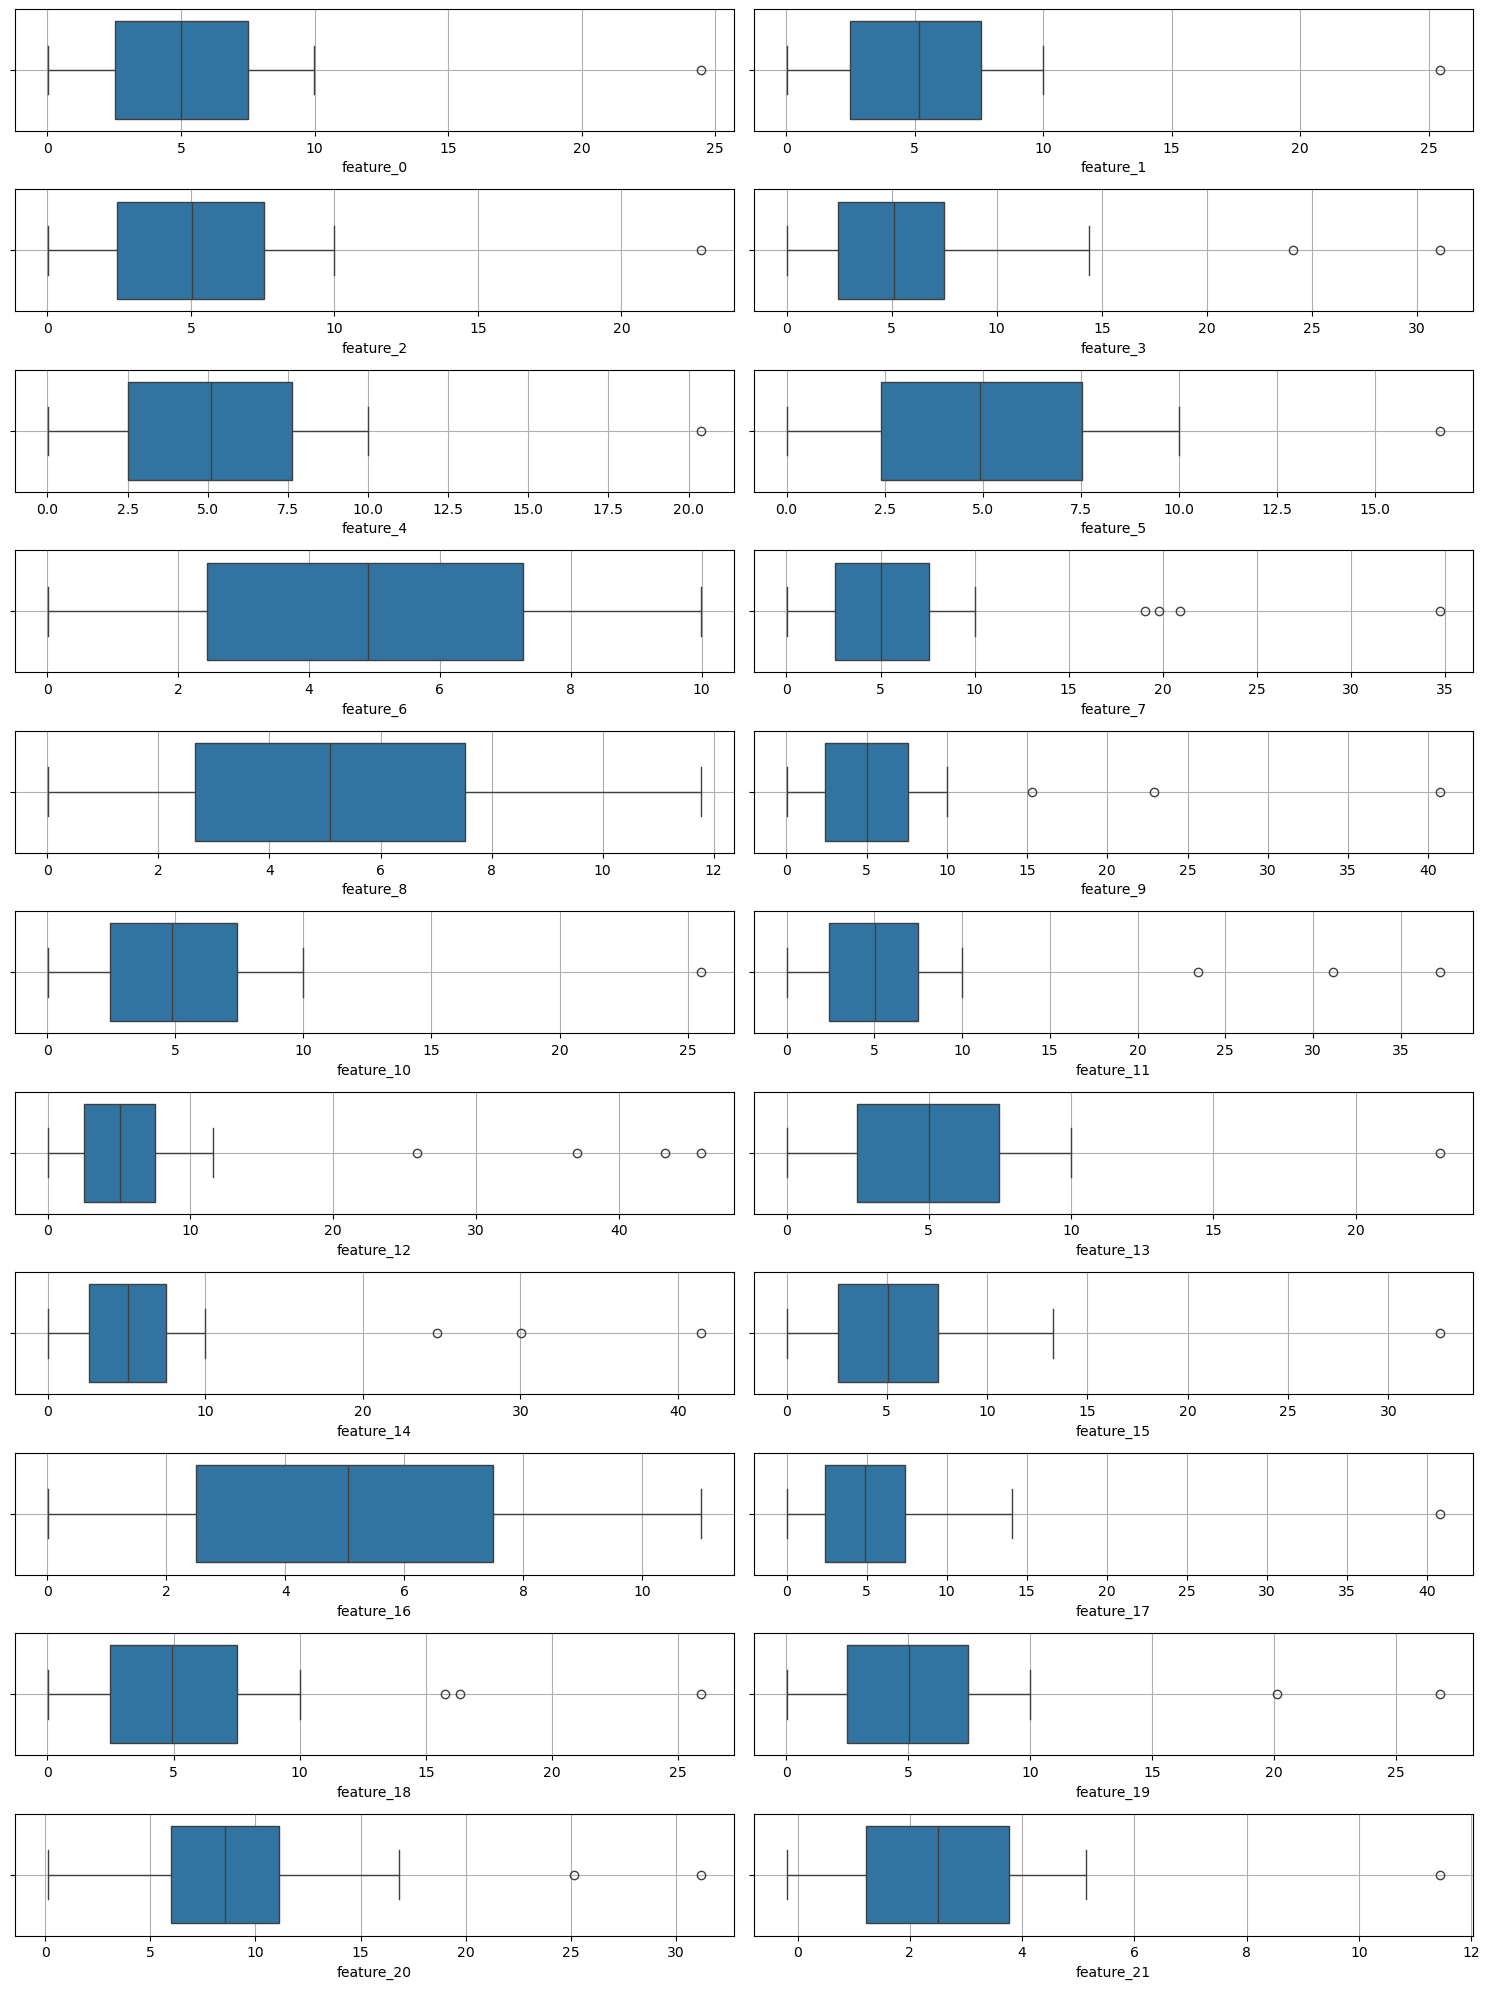

-------------------- Correlacions --------------------


<Axes: >

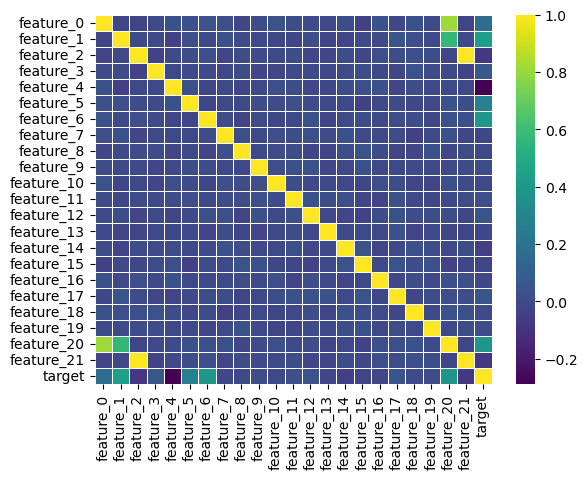

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print("-------------------- Shape --------------------")
print(df_regression.shape, "\n") # (files, columnes)
print("-------------------- Columnes --------------------")
print(df_regression.columns, "\n")
print("-------------------- Max target --------------------")
print(f"Màxim target = {max(df_regression["target"])}\n")
print("-------------------- Min target --------------------")
print(f"Mínim target = {min(df_regression["target"])}\n")
print("-------------------- Comprovació de nulls --------------------")
print(df_regression.isnull().sum(), "\n")
print("-------------------- Tipus de les columnes --------------------")
print(df_regression.dtypes, "\n")
print("-------------------- Outliers (nombre) --------------------")
df_reg_nums = df_regression.drop(columns=["feature_22", "target"]) # Buscar outliers a totes les columnes numeriques menys la target
q1_reg = df_reg_nums.quantile(0.25)
q3_reg = df_reg_nums.quantile(0.75)
iqr_reg = q3_reg - q1_reg
upper_limit_reg = q3_reg + (1.5 * iqr_reg)
lower_limit_reg = q1_reg - (1.5 - iqr_reg)
otuliers_reg = ((df_reg_nums < lower_limit_reg) | (df_reg_nums > upper_limit_reg))
print(otuliers_reg.sum())
print("-------------------- Outliers (gràfics) --------------------")
plt.figure(figsize=(15,20))
i = 1
for column in df_reg_nums.columns:
    plt.subplot(11, 2, i)
    sns.boxplot(data=df_reg_nums, x=column)
    plt.grid(True)
    plt.tight_layout()
    i += 1
plt.show()
print("-------------------- Correlacions --------------------")
df_reg_nums["target"] = df_regression["target"]
correlations_reg = df_reg_nums.corr() # Matriu de correlació
sns.heatmap(correlations_reg, linewidth=.5, cmap="viridis")

In [8]:
print("-------------------- Duplicats --------------------")
duplicates_reg = df_regression.duplicated().sum()
print(f"Duplicats = {duplicates_reg}")

-------------------- Duplicats --------------------
Duplicats = 0


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Anàlisi d'informació bàsica** -> Es pot observar que el _dataset_ està compost per 3000 files i 24 columnes. Aquestes columnes, a excepció de la columna _target_, segueixen un patró en el seu nom: "feature_i" on: $$i \in [0, 20] \forall i \in \mathbb{N}$$

**Anàlisi de nulls** -> S'ha pogut comprovar que el _dataset_ no conté _nulls_.

**Anàlisi d'outliers** -> S'ha pogut comprovar que totes les columnes numèriques _feature_i_ tenen valors extrems. S'ha demostrar la seva existència tant numèricament com gràficament.

**Anàlisi de correlacions** -> S'ha pogut comprovar que quasi totes les parelles tenen una correlació molt prropera a 0 (color blau), indicant que no hi ha correlació entre les variables, manys algunes de molt concretes (colors verd, morat i groc), indicant que sí hi ha correlació entre les variables. Morat per una correlació negativa i verd i groc per una correlació positiva. S'ha exclòs la variable categòrica ja que _corr()_ utilitza la correlació de Pearson.

**Anàlisi de duplicats** -> S'ha pogut comprovar que el _dataset_ no té registres duplicats.
</div>

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

3. Aplicar una estratègia de codificació adequada per poder fer servir les variables categòriques en els models. Justifica la teva elecció.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [9]:
df_reg_encoded = pd.get_dummies(df_regression, columns=["feature_22"], dtype=int)
df_reg_encoded.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_17,feature_18,feature_19,feature_20,feature_21,target,feature_22_RegCat_0,feature_22_RegCat_1,feature_22_RegCat_2,feature_22_RegCat_3
0,1.116128,6.691743,9.349368,4.709568,1.547680,5.929364,5.965084,6.876529,7.302419,4.618961,...,8.389263,9.668625,3.867814,5.602655,4.846594,3.106014,0,0,1,0
1,5.387639,4.881082,8.744185,4.711230,8.172760,8.520234,9.749182,9.122798,8.248635,1.416425,...,1.044314,7.236030,2.584318,8.820014,4.398644,7.092057,0,0,0,1
2,0.812016,5.537114,4.829327,7.714664,8.933394,3.406353,0.373492,1.834917,1.427191,0.925112,...,0.192824,6.466151,1.570128,4.598168,2.497320,-3.105620,1,0,0,0
3,3.223983,2.787226,3.913597,8.372647,0.931298,1.886093,5.871562,9.175196,2.118159,1.029306,...,6.443707,5.900566,7.082611,5.066236,1.935365,4.442592,0,1,0,0
4,8.098364,3.439891,9.751921,1.590900,7.911253,3.574520,5.974649,9.812732,2.968866,5.552527,...,0.116236,6.812317,5.572394,10.703050,4.943327,1.573806,0,1,0,0


<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

S'ha codificat la variable _feature_22_ amb la tècnica _One-Hot_, ja que hi ha una gran quantitat d'algorismes de _machine learning_ que no "saben" com processar les variables categòriques, per tant, s'ha transformat la variable categòrica a numèrica.

Per fer-ho s'ha près cada possible valir de _feature_22_ i s'ha creat una columna per cada. Cada columna tindrà un 1 o un 0 depenen del valor de la variable categòrica.

</div>

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

4. Visualitza la relació entre la variable objectiu i almenys dues variables predictores numèriques i una categòrica (ex., scatter plots, boxplots per categoria).
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

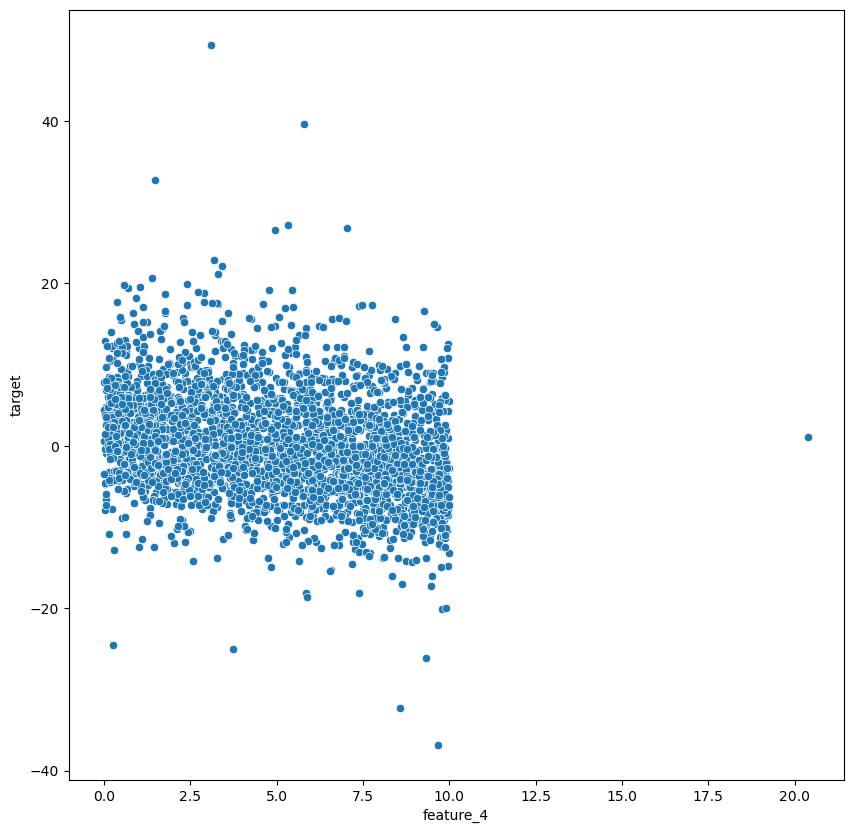

In [22]:
# Relació entre target i feature_4
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_regression, x="feature_4", y="target")
plt.show()

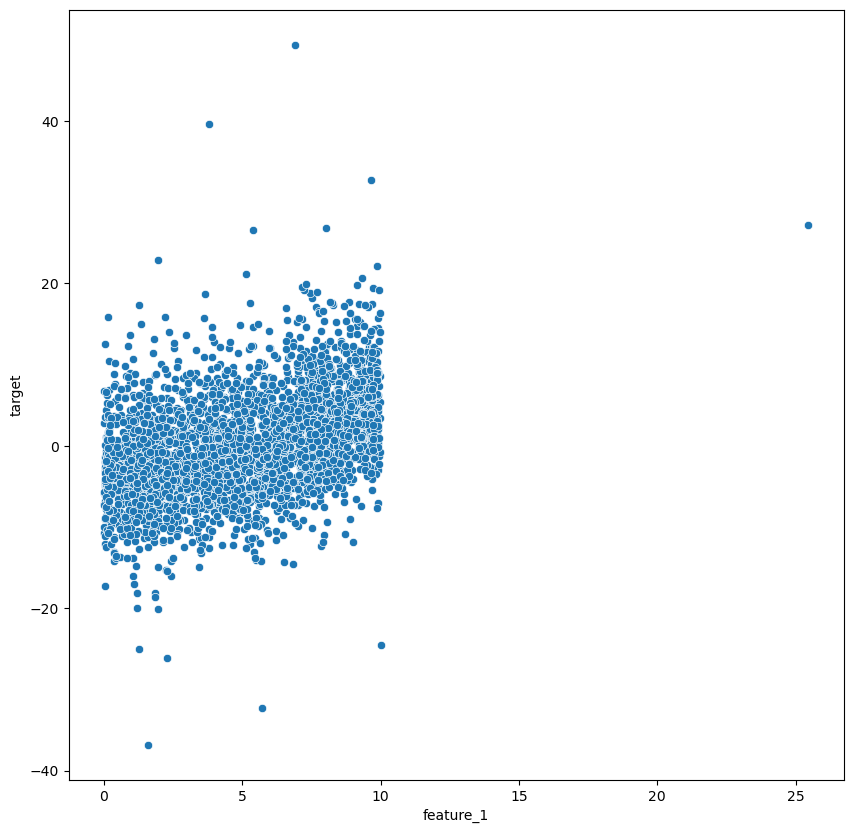

In [27]:
# Relació entre target i feature_1
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_regression, x="feature_1", y="target")
plt.show()

<Axes: >

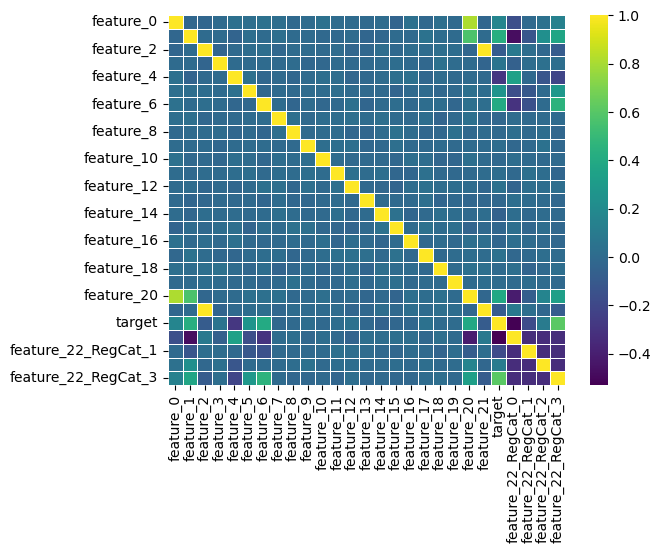

In [34]:
encoded_correlations_reg = df_reg_encoded.corr()
sns.heatmap(encoded_correlations_reg, linewidth=.5, cmap="viridis")

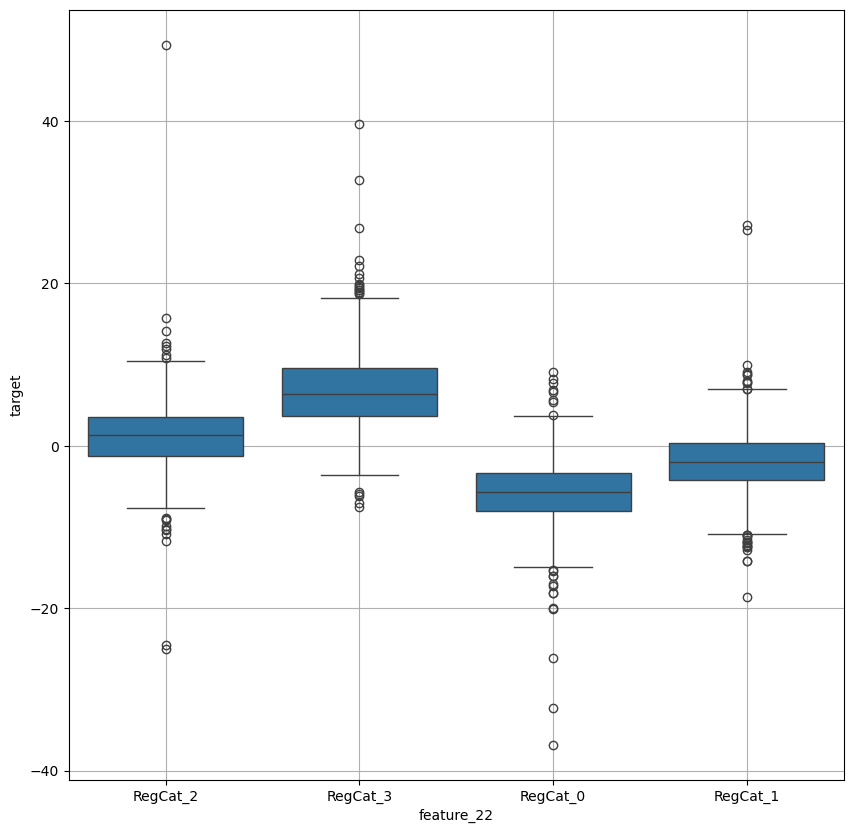

In [36]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_regression, x="feature_22", y="target")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Anàlisi** -> En el cas de les variables numèriques es pot observar com, en el cas de _feature_4_,  hi ha una relació negativa, ja que a mesura que _feture_4_ augmenta, _target_ disminueix. En el cas de _feature_1_, la relació es positiva, ja que a mesura que una augmenta l'altra també ho fa.

Pel que fa la variable categòrica, es pot observar una gran variabilitat en les medianes. RegCat_0 i RegCat_1 tenen una mediana negativa i les altres dues una mediana positiva. Pel que fa a l'IQR de les categories (mida de les caixes) és pot observar que, més o menys, totes 4 categories presenten un IQR paregut (l'unica que sembla tenir un IQR una mica mes elevat és RegCat3). També s'observa que totes les categhories presenten valors extrems. Finalment, es pot observar que per cada possible valor de _feature_22_ hi ha un rang concret de _target_ (tot i que en alguns casos alguna part de la caixa "envaiexi" el rang d'una altra. Per exemple RegCat_1 "envaeix" una porció de l'espai superior de RegCat0 i una porció de l'espai inferior de RegCat2).

</div>

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

5. **Anàlisi Crítica:** Basant-te en la teva EDA (distribució del target, scatter plots), quines característiques de les dades (ex., no linealitats aparents, valors atípics, possible heteroscedasticitat) podrien suposar un desafiament per a models de regressió lineal simples? Esperaries que els ensembles basats en arbres funcionessin millor aquí? Per què?
6. D'acord amb l'anterior, realitza el que consideris necessari per preparar les dades per efectuar el procés de regressió de forma adequada. Recorda prendre les mesures necessàries per evitar biaixos, sobreajustament, fuga de dades, etc. Justifica cadascuna de les decisions preses.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [38]:
# Split train/test
from sklearn.model_selection import train_test_split
X = df_reg_encoded.drop("target", axis=1)
y = df_reg_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# RobustScaler() per outliers
from sklearn.preprocessing import RobustScaler
scaler_reg = RobustScaler()
X_train_no_outliers = scaler_reg.fit_transform(X_train)
X_test_no_outliers = scaler_reg.transform(X_test)

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

**Anàlisi crítica** -> Un dels grans desafiaments per a un model de regressió lineal simple son els _outliers_, ja que aquests models són molt sensibles a aquests valors i podrien provocar biaixos en el model.

Un altre desafiament per als models de regressió lineal son la falta de relacions lineals. si obtinguessim el _scatterplot_ de totes les variables per veure la seva relació amb _target_ i en algún d'ells observessim que el núbol de punts descriu una corba, això indicaria que el model de regressió lineal no "sabria" com capturar aquesta relació.

La heterosedasticitat, provocaria que el model no fos el millor y que els intervals de confiança y els test d'hipòtesis donessin resultats enganyosos.

Els models _ensemble_ son algorismes molt bons a l'hora de capturar relacions no lineals, però això no significa que no puguin capturar relacions lineals.

Els mètodes _boosting_ i _Gradient Boosting_ són mètodes que saben treballar amb _datasets_ equilibrats, però tenen el desavantatge que tendeixen a patir _overfitting_ amb els valors extrems.

Els mètodes _Bagging_ i _Ranfom Forest_ tenen una major tendència a patir _overfitting_ en les tasques de regressió.

Per tant, si es tracten els valors atípics, _boosting_ i _Gradient Boosting_ són dues tècniques amb molt potencial en aquesta secció.

**Justificacions d'adequació de dades** ->
- Split train/test abans de RobustScaler-> Per evitar el _data leakage_. És a dir per evitar que els estadístics que calcula RobustScaler es "filtrin" a les dades de test.
- RobustScaler -> Per tractar els _outliers_. A diferència d'altres _sclaers_ aquest no és sensible als valors extrems. Tractar els valors extrems permetrà "erradicar" el principal handicap de _boosting_ i _Gradient Boosting_.
</div>

**Consultes externes:**

[Agustín Mora.(26/04/2024)._Heterocedasticidad: Impacto en la regresión lineal_.Data Machine Learning Visualization](https://blog.damavis.com/heterocedasticidad-impacto-en-la-regresion-lineal/)

[Javier Parra.(30/09/2021)._Introducción a la heterocedasticidad_.Javier Parra](https://www.javierparra.net/ecoknowmic/introduccion-a-la-heterocedasticidad/)

[Autoría no especificada.(nd)._UNIDAD 5: EL ESTUDIO DE LA RELACIÓN ENTRE VARIABLES_.edunam](https://editorial.unam.edu.ar/images/documentos_digitales/06-EstadisticaI-unidad5.pdf)

[Katie Gross.(06/04/2020)._Tree-Based Models: How They Work (In Plain English!)_.dataiku](https://blog.dataiku.com/tree-based-models-how-they-work-in-plain-english)

[John Tsiligaridis.(nd)._Tree-Based Ensemble Models, Algorithms and Performance Measures for Classification_.ASTES](https://www.astesj.com/v08/i06/p03/#1639848202927-7c57dd68-5f71)

[Autor no disponible.(nd)._RobustScaler_.InteractiveChaos making thins simple](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/robustscaler)

### 2.2. Entrenament i Avaluació de Models Base (0.5 punts)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Implementa i avalua dos models base utilitzant 5-CV:
   * Regressió Lineal (`LinearRegression`)
   * Arbre de Decisió regresor (`DecisionTreeRegressor`)
2. Reporta les mètriques mitjanes de 5-CV: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) i R².
3. **Anàlisi Crítica:**&nbsp; Estableix aquests resultats com a línia base. Compara el rendiment d'ambdós models utilitzant els teus valors reportats de R² i RMSE. Quin va funcionar millor? Era això esperable basant-te en la teva anàlisi EDA prèvia sobre possibles no linealitats?.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [8]:
# Escriu aquí el teu codi, fes servir tantes cel·les com creguis convenients

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Comenta dins d'aquesta cel·la la teva anàlisi crítica, fes servir tantes cel·les com creguis convenient.

</div>

### 2.3. Combinació paral·lela de regresors de base similar: Bagging o Boosting (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Selecciona i implementa un regresor combinat de base similar (`RandomForestRegressor`, `AdaBoostRegressor`, `GradientBoostingRegressor`, `XGBoost`, `LightGBM`). Justifica l'elecció.
2. Realitza una cerca i ajust (tuning) d'hiperparàmetres clau (n_estimators, max_depth, max_features) utilitzant validació creuada (ex., GridSearchCV o RandomizedSearchCV amb 5-CV). Pots optimitzar per a `neg_root_mean_squared_error` o `r2`.
3. Reporta els millors hiperparàmetres trobats i l'score de validació creuada obtingut amb ells.
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [8]:
# Escriu aquí el teu codi, fes servir tantes cel·les com creguis convenients

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Comenta dins d'aquesta cel·la la teva anàlisi crítica, fes servir tantes cel·les com creguis convenient.

</div>

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

4. Valida (amb el conjunt de dades de validació) el model final (entrenat amb els millors hiperparàmetres sobre tot el conjunt d'entrenament).
5. Mostra les mètriques (RMSE, MAE, R²) i genera dos gràfics clau:
   * Gràfic de Valors Predits vs. Valors Reals.
   * Gràfic de Residus (Predits - Reals) vs. Valors Predits.
7. **Anàlisi Crítica:** Compara el rendiment del teu Regressor optimitzat amb els models base (utilitza els teus valors de RMSE/R²). Analitza detingudament els teus gràfics de 'Predits vs Reals' i de 'Residus': S'ajusten bé els punts a la línia diagonal en el primer gràfic? Mostren els residus un patró aleatori al voltant de zero en el segon gràfic, o hi detectes alguna estructura (forma d'embut suggeridora d'heteroscedasticitat, o una corba suggeridora de no linealitat no capturada)? Relaciona les teves observacions dels residus amb les complexitats que esperes del dataset. Quines variables identifica el Regressor com les més importants?
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [8]:
# Escriu aquí el teu codi, fes servir tantes cel·les com creguis convenients

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Comenta dins d'aquesta cel·la la teva anàlisi crítica, fes servir tantes cel·les com creguis convenient.

</div>

### 2.4. Combinació seqüencial de regresors de base diferent: Stacking o Cascading (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Utilitza els models base implementats a la secció 2.2 i afegeix un altre regresor base (ex. `KNeighborsRegressor`, `SVR(kernel='linear'...)`). Argumenta la teva elecció.
3. Tria un meta-regressor (ex., `Ridge` o `LinearRegression`).
4. Selecciona un tipus de combinació (Stacking o Cascada). Valida el regresor complet fent servir les dades de validació amb les mètriques utilitzades anteriorment.
5. **Anàlisi Crítica:** Compara el rendiment del teu regresor amb els resultats anteriors. Va aportar el teu regresor una millora significativa del rendiment en aquest dataset?&nbsp;
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [8]:
# Escriu aquí el teu codi, fes servir tantes cel·les com creguis convenients

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Comenta dins d'aquesta cel·la la teva anàlisi crítica, fes servir tantes cel·les com creguis convenient.

</div>

### 2.5. Comparació Global i Conclusions (1 punt)

<div class="alert alert-block alert-info">
<h4>Implementació:</h4>

1. Crea una taula resum que compari clarament el rendiment (RMSE, MAE, R² mitjanes de 5-CV) de tots els models implementats (línies base i ensembles). Si és possible i rellevant, afegeix una columna amb el temps d'ajust/entrenament aproximat.
2. **Anàlisi Crítica Final:** Basant-te exclusivament en els resultats numèrics de la teva taula resum, quin paradigma d'ensemble learning (Bagging, Boosting, Stacking, Cascading) va demostrar el millor rendiment global per a aquest problema de regressió? Justifica la teva elecció referint-te a valors específics de la teva taula.

**Reflexiona críticament:** Com creus que els diferents ensembles van gestionar les complexitats introduïdes al dataset (no linealitat, interaccions, soroll, possibles valors atípics/heteroscedasticitat)?
</div>

<div class="alert alert-block alert-danger">
<h4>Solució:</h4>
</div>

In [8]:
# Escriu aquí el teu codi, fes servir tantes cel·les com creguis convenients

<div class="alert alert-block alert-success">
<h4>Anàlisi:</h4>  

Comenta dins d'aquesta cel·la la teva anàlisi crítica, fes servir tantes cel·les com creguis convenient.

</div>